### Import packages

In [1]:
import pandas as pd
import numpy as np
import merging_functions as mf ### this package included part of the code that are repeated
                                 # throughout to make it more efficient
import matplotlib.pyplot as plt

### Define city and work folder

In [2]:
city='Memphis'

FIPS = [28033, 28093, 47047, 47157]

folder = 'Input_Files/'+city+'/'
out_folder = 'Output/'

### Load Stata Output File for Comparison

In [3]:
output = pd.read_stata(out_folder + 'clean_Memphis_merge_081319.dta')
output.head(2)

,trtid10,hinc_00,pop_00,nhwhite_00,nhblk_00,asian_00,hisp_00,hh_00,hu_00,ohu_00,...,low_pdmt_55cut_80120_medhhinc_00,high_pdmt_55cut_80120_00,mod_pdmt_55cut_80120_medhhinc_00,mix_low_55cut_80120_medhhinc_00,mix_mod_55cut_80120_medhhinc_00,mix_high_55cut_80120_medhhinc_00,inc_cat_55cut_80120_medhhinc_00,_merge_inclevel_2000,lmh_flag_new_encoded,aff_change_cat_full_encoded
0,28033070101,26255.709055,2252.779795,1744.566281,321.876895,17.807748,133.342661,808.417601,814.496918,536.503728,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,matched (3),4.0,16.0
1,28033070102,34183.920552,2933.442759,2271.636352,419.144058,23.191507,173.653476,1052.668140,1060.587191,698.573430,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,matched (3),4.0,16.0


In [4]:
output = mf.trtid10_to_FIPS(output)
output = output[~output['FIPS'].isna()]
output['FIPS'] = output['FIPS'].apply(np.int).apply(lambda x: '{0:0>10}'.format(x))

### Load base merge file

Also called joined_data_030619_cleaned

In [5]:
### Load file
raw_data=pd.read_stata(folder+'Memphis_031019.dta')

### Drop 2016 data
raw_data_dropped = raw_data[raw_data.columns.drop(list(raw_data.filter(regex='_16')))]

### Rename trtid10 to FIPS and reformat number
base_data = mf.trtid10_to_FIPS(raw_data_dropped)

base_data.head(1)

,FIPS,hinc_00,pop_00,nhwhite_00,nhblk_00,asian_00,hisp_00,hh_00,hu_00,ohu_00,...,mrent_17_cv,mhval_17_cv,cvcat_pop_17,cvcat_hu_17,cvcat_mrent_17,cvcat_mhval_17,cvcat_hinc_17,cvcat_per_col_17,cvcat_per_rent_17,cv_typology
0,28033070101,26255.709055,2252.779795,1744.566281,321.876895,17.807748,133.342661,808.417601,814.496918,536.503728,...,0.029545,0.047933,good,good,good,good,good,good,good,LI - At Risk of Gentrification and/or Displace...


### Load income 1990 data

In [6]:
# ### Load file
# raw_income_data=pd.read_stata(folder+'income1990.dta')

# ### Rename trtid10 to FIPS and reformat number
# income_1990 = mf.trtid10_to_FIPS(raw_income_data)

# ### Drop irrelevant columnsb
# income_1990 = income_1990.drop(columns = ['DIVISION', 'REGION', 'NATION',
#                             'QName', 'GEOCOMP', 'NAME',
#                             'STATE', 'COUNTY', 'CT', 'SUMLEV'])
# income_1990.head(1)

### Load ACS 2000 data

In [7]:
### Load file
# raw_acs_2000=pd.read_stata(folder+'2000_a.dta')

# ### Keep only relevant columns
# acs_2000 = raw_acs_2000[['pop_00', 'white_00', 'nhblk_00', 'asian_00', 'hisp_00',
#                             'per_nonwhite_00', 'per_nhblk_00', 'per_hisp_00', 'per_asian_00',
#                             'trtid10', 'per_carcommute_00']].copy(deep=True)

# ### Rename trtid10 to FIPS and reformat number
# acs_2000 = mf.trtid10_to_FIPS(acs_2000)

# acs_2000.head(1)

##### This section double checks that FIPS == trtid10

In [8]:
# raw_acs_2000['trtid10'] = raw_acs_2000['trtid10'].apply(np.int).apply(lambda x: '{0:0>11}'.format(x)) 
# a = len(raw_acs_2000[raw_acs_2000['FIPS']==raw_acs_2000['trtid10']])
# b = len(raw_acs_2000)

# if a ==b:
#     print ('FIPS and trtid10 match up')
# else:
#     print ('There is an error in the database')

### Load income 2000 data

In [9]:
# ### Load file
# # Contains median household incomes for 1990,2000 & 2017 ****** THIS IS NOT TRUE - 2016 -
# # & older method for income breakdown (vli, li, mi, hmi, hi, vhi)
# raw_income_2000=pd.read_stata(folder+'2000_incomedata.dta')

# ### Keep only relevant columns
# columns = ['NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT']
# income_2000 = raw_income_2000.drop(columns = columns)
# # income_2000 = raw_income_2000[['trtid10', 'countymedian_income00', 'hinc_90',
# #                                'hinc_00', 'hinc_16',
# #                                'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000']]

# ### Rename trtid10 to FIPS and reformat number
# income_2000 = mf.trtid10_to_FIPS(income_2000)

# income_2000.head(1)

### Load income 2017 data

In [10]:
# ### Load file
# # Contains median household incomes for 2017 & older method for income breakdown (vli, li, mi, hmi, hi, vhi)
# raw_income_2017=pd.read_stata(folder+'income2017.dta')

# ### Keep only relevant columns
# income_2017 = raw_income_2017[['trtid10', 'hinc_17', 'regmedhhi_17',
#                                'vli2017', 'li2017', 'mi2017', 'hmi2017', 'hi2017', 'vhi2017']]

# ### Rename trtid10 to FIPS and reformat number
# income_2017 = mf.trtid10_to_FIPS(income_2017)

# income_2017.head(5)

In [11]:
# ### Double check with ACS 17-5Yr Estimates
# ### Load file
# # Contains median household incomes for 2017 & older method for income breakdown (vli, li, mi, hmi, hi, vhi)
# raw_ACS_2017_income=pd.read_csv(folder+'ACS_17_5YR_S1901_with_ann.csv')
# ACS_2017_income = raw_ACS_2017_income.drop(raw_ACS_2017_income.index[0]).reset_index(drop = True)
# ACS_2017_income = ACS_2017_income[['GEO.id2','HC01_EST_VC13']]
# ACS_2017_income = ACS_2017_income.rename(columns = {'GEO.id2':'FIPS'})
# ACS_2017_income[ACS_2017_income['FIPS']=='17031010100']

In [12]:
print('hinc_17 is the HH median income for 2017')

hinc_17 is the HH median income for 2017


### Load renter and homeowner data *** THIS NEEDS CHECKING

In [13]:
### Load file
# Contains 2017 owner & rental occupied housing, population, household units
# Contains median household income, college, homes build prior to 1950  #### ??!!
# raw_tenure_2017=pd.read_stata(folder+'2017_102618.dta')

# ### Rename trtid10 to FIPS and reformat number
# tenure_2017 = mf.trtid10_to_FIPS(income_2017)

# tenure_2017.head(1)

### Load ACS Census Data 1990 data

In [14]:
### Load file
# raw_acs_1990=pd.read_stata(folder+'nonwhite_90.dta')

# ### Keep only relevant columns
# acs_1990 = raw_acs_1990[['r_per_nonwhite_90', 'nhwhite_90', 'RC1990SF3_001_P012_001',
#                             'trtid10']].copy(deep=True)

# ### Rename trtid10 to FIPS and reformat number
# acs_1990 = mf.trtid10_to_FIPS(acs_1990)

# acs_1990.head(1)

### Load movers 2009 data

In [15]:
# ### Load file
# # Contains regional medain , 2009 movein totals, percent low income move-in in 2009
# raw_movers_2009=pd.read_stata(folder+'2009_movers.dta')

# ### Keep only relevant columns
# movers_2009 = raw_movers_2009.drop(columns = 'FIPS')

# ### Rename trtid10 to FIPS and reformat number
# movers_2009 = mf.trtid10_to_FIPS(movers_2009)

# movers_2009.head(1)

### Load movers 2010 data

In [16]:
# ### Load file
# raw_movers_2010=pd.read_stata(folder+'YearHouseholderMovedIn_Memphis2010.dta')

# ### Rename trtid10 to FIPS and reformat number
# movers_2010 = mf.trtid10_to_FIPS(raw_movers_2010)

# movers_2010.head(1)

### Load Year HHed Moved In

In [17]:
### Load file
raw_movin_year=pd.read_stata(folder+'YearHouseholderMovedIn_Memphis2010.dta')

### Rename trtid10 to FIPS and reformat number
movin_year = mf.trtid10_to_FIPS(raw_movin_year)

### Rename Standard Deviations Columns
movin_year = movin_year.rename(columns = {'B25038001s':'se_occupiedunits',
                                         'B25038002s':'se_owneroccunits',
                                         'B25038003s':'se_ownerocc_2015orlater',
                                         'B25038004s':'se_ownerocc_2010to2014',
                                         'B25038005s':'se_ownerocc_2000to2009',
                                         'B25038006s':'se_ownerocc_1990to1999',
                                         'B25038007s':'se_ownerocc_1980to1989',
                                         'B25038008s':'se_ownerocc_1979orearlier',
                                         'B25038009s':'se_renteroccunits',
                                         'B25038010s':'se_renterocc_2015orlater',
                                         'B25038011s':'se_renterocc_2010to2014',
                                         'B25038012s':'se_renterocc_2000to2009',
                                         'B25038013s':'se_renterocc_1990to1999',
                                         'B25038014s':'se_renterocc_1980to1989',
                                         'B25038015s':'se_renterocc_1979orearlier'})

### Keep only relevant columns
movin_year = movin_year[['FIPS', 'se_occupiedunits', 'se_owneroccunits',
                         'se_ownerocc_2015orlater', 'se_ownerocc_2010to2014', 'se_ownerocc_2000to2009',
                         'se_ownerocc_1990to1999', 'se_ownerocc_1980to1989', 'se_ownerocc_1979orearlier',
                         'se_renteroccunits', 'se_renterocc_2015orlater', 'se_renterocc_2010to2014',
                         'se_renterocc_2000to2009', 'se_renterocc_1990to1999', 'se_renterocc_1980to1989',
                         'pct_renter_recentmovein', 'pct_owner_recentmovein', 'pct_tot_recentmovein',
                         'pct_renter_recentmovein2010', 'pct_owner_recentmovein2010', 'pct_tot_recentmovein2010',
                         'rm_pct_recentmovein', 'aboverm_pct_recentmovein', 'rm_pct_recentmovein2010',
                         'aboverm_pct_recentmovein2010', 'occupiedunits', 'owneroccunits',
                         'ownerocc_2015orlater', 'ownerocc_2010to2014', 'ownerocc_2000to2009',
                         'ownerocc_1990to1999', 'ownerocc_1980to1989', 'renteroccunits', 'renterocc_2015orlater',
                         'renterocc_2010to2014','renterocc_2000to2009', 'renterocc_1990to1999',
                         'renterocc_1980to1989']]


movin_year.head(1)

,FIPS,se_occupiedunits,se_owneroccunits,se_ownerocc_2015orlater,se_ownerocc_2010to2014,se_ownerocc_2000to2009,se_ownerocc_1990to1999,se_ownerocc_1980to1989,se_ownerocc_1979orearlier,se_renteroccunits,...,ownerocc_2010to2014,ownerocc_2000to2009,ownerocc_1990to1999,ownerocc_1980to1989,renteroccunits,renterocc_2015orlater,renterocc_2010to2014,renterocc_2000to2009,renterocc_1990to1999,renterocc_1980to1989
0,28033070101,57.575758,64.848485,15.757576,36.363636,58.181818,24.848485,15.757576,20.606061,70.909091,...,111,210,79,34,605,56,393,156,0,0


In [18]:
#### replaces NaN with zeros
movin_year['pct_tot_recentmovein2010'][movin_year['pct_tot_recentmovein2010'].isna()] = 0

### Load exclusive zones data

In [19]:
### Load file
raw_exclusive_zone=pd.read_csv(folder+'Memphis_Proximity.csv')

## Drop rows without data
raw_exclusive_zone = raw_exclusive_zone.dropna().reset_index(drop=True)

###Rename variable
raw_exclusive_zone = raw_exclusive_zone.rename(columns = {'excli':'exclusive'})

raw_exclusive_zone['trtid10'][raw_exclusive_zone['trtid10']==' ']=0

## Rename trtid10 to FIPS and reformat number
exclusive_zone = mf.trtid10_to_FIPS(raw_exclusive_zone)

### Keep only relevant columns
exclusive_zone = exclusive_zone[['FIPS', 'proximity', 'exclusive']]

### Convert dummy to int
exclusive_zone['exclusive'] = exclusive_zone['exclusive'].astype(int)

### Keep only records for the census tracts defined in FIPS variable
exclusive_zone['FIPS_temp']=exclusive_zone['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
exclusive_zone = exclusive_zone[exclusive_zone['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
exclusive_zone = exclusive_zone.drop(columns='FIPS_temp')

exclusive_zone.head()

['28033', '28093', '47047', '47157']


C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,FIPS,proximity,exclusive
0,47157000200,0,0
1,47157000800,0,0
2,47157003500,1,1
3,47157005900,0,0
4,47157007500,0,0


### Load mortgage application data

In [20]:
### Load file
raw_mortgage=pd.read_stata(folder+'Memphis_HMDA_Denial_Application_Rates.dta')

### Rename trtid10 to FIPS and reformat number
mortgage = mf.trtid10_to_FIPS(raw_mortgage)

### Convert dummy to int
mortgage['low_app_rate'] = mortgage['low_app_rate'].astype(int)

### Keep only relevant columns
mortgage = mortgage[['FIPS', 'owneroccunits', 'renterocc_units',
                                 'per_own_17', 'per_rent_17', 'tot_units', 'applicationrate',
                                 'high_dr20', 'high_dr25', 'high_dr30', 'low_app_rate']]
mortgage.head()

## rename high_dr20 high_denialrate20
## rename high_dr25 high_denialrate25
## rename high_dr30 high_denialrate30
## why is this part of only this code in specific?

,FIPS,owneroccunits,renterocc_units,per_own_17,per_rent_17,tot_units,applicationrate,high_dr20,high_dr25,high_dr30,low_app_rate
0,28033070101,543,605,47.299999,52.700001,1148.0,0.051394,1.0,0.0,0.0,0
1,28033070102,1225,195,86.269997,13.730000,1420.0,0.159859,1.0,0.0,0.0,0
2,28033070210,1807,662,73.190002,26.809999,2469.0,0.102066,1.0,1.0,1.0,0
3,28033070221,1105,422,72.360001,27.639999,1527.0,0.106090,1.0,1.0,0.0,0
4,28033070222,747,892,45.580002,54.419998,1639.0,0.084808,0.0,0.0,0.0,0


### Load public housing data

In [21]:
### Load file
raw_pub_housing=pd.read_stata(folder+'ph-LIHTC_merge_memphis_062519.dta')

## Rename trtid10 to FIPS and reformat number
pub_housing = mf.trtid10_to_FIPS(raw_pub_housing)

### Keep only relevant columns
pub_housing = pub_housing[['FIPS', 'presence_ph_LIHTC']]
pub_housing['presence_ph_LIHTC']=pub_housing['presence_ph_LIHTC'].astype(int)

pub_housing.head()

,FIPS,presence_ph_LIHTC
0,28047000300,1
1,28047000600,1
2,28047001800,1
3,28093950401,1
4,28093950402,1


### Load prison data

In [22]:
### Load file
raw_prison=pd.read_stata(folder+'MemphisPrison_Processed.dta')

## Rename trtid10 to FIPS and reformat number
prison = mf.trtid10_to_FIPS(raw_prison)

### Keep only relevant columns
prison = prison[['FIPS', 'prison_pct', 'prison_flag', 'highprisonpop_flag']]

### Convert dummy to int
prison['prison_flag']=prison['prison_flag'].astype(int)
prison['highprisonpop_flag']=prison['highprisonpop_flag'].astype(int)

prison.head()

,FIPS,prison_pct,prison_flag,highprisonpop_flag
0,05035030101,0.0,0,0
1,05035030102,0.0,0,0
2,05035030201,0.0,0,0
3,05035030202,0.0,0,0
4,05035030301,0.0,0,0


### Prepare LI Home-ownership data

In [23]:
### Load file
raw_LI_HOW_flag=pd.read_stata(folder+'homeownershipflag_LIneighbs.dta')

## Rename trtid10 to FIPS and reformat number
LI_HOW_flag = mf.trtid10_to_FIPS(raw_LI_HOW_flag)

### Keep only records for the census tracts defined in FIPS variable
LI_HOW_flag['FIPS_temp']=LI_HOW_flag['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
LI_HOW_flag = LI_HOW_flag[LI_HOW_flag['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
LI_HOW_flag = LI_HOW_flag.drop(columns='FIPS_temp')

### Keep only relevant columns
LI_HOW_flag = LI_HOW_flag[['FIPS', 'LItract', 'homeownership_rm_LItracts', 'aboverm_homeownership_LItracts']]

### Convert dummy to int
LI_HOW_flag['LItract']=LI_HOW_flag['LItract'].astype(int)

# *** THIS SET OF CODE WON'T RUN BC OF NAN VALUES ***
# LI_HOW_flag['aboverm_homeownership_LItracts']=LI_HOW_flag['aboverm_homeownership_LItracts'].astype(int)

LI_HOW_flag.head()

['28033', '28093', '47047', '47157']


,FIPS,LItract,homeownership_rm_LItracts,aboverm_homeownership_LItracts
0,28033070101,0,69.160004,0.0
1,28033070102,0,69.160004,1.0
2,28033070210,0,69.160004,1.0
3,28033070221,0,69.160004,1.0
4,28033070222,0,69.160004,0.0



### Load foreclosure data

In [24]:
##foreclosures seem to be missing 20 tracts (251) while full data has 271 
##original foreclosure flag file has 385 observations but wasn't clipped appropriately 

### Load file
raw_foreclosure=pd.read_stata(folder+'Memphis_Foreclosure_062019.dta')

# ## Rename trtid10 to FIPS and reformat number
raw_foreclosure = raw_foreclosure.rename(columns = {'tractcode':'trtid10'})
foreclosure = mf.trtid10_to_FIPS(raw_foreclosure)

### Keep only relevant columns
foreclosure = foreclosure[['FIPS', 'estimated_foreclosure_rate', 'rm_foreclosure_rate', 'aboverm_foreclosurerate']]

### Convert dummy to int
foreclosure['aboverm_foreclosurerate']=foreclosure['aboverm_foreclosurerate'].astype(int)

foreclosure.head()

,FIPS,estimated_foreclosure_rate,rm_foreclosure_rate,aboverm_foreclosurerate
0,47047060100,5.9%,6.7,0
1,47047060200,5.5%,6.7,0
2,47047060300,6.3%,6.7,0
3,47047060400,3.1%,6.7,0
4,47047060500,5.2%,6.7,0


### Load neighborhood income level data

In [25]:
### Load file
raw_neigh_income=pd.read_stata(folder+'neighb_inc_level_053119.dta')

# ## Rename trtid10 to FIPS and reformat number
raw_neigh_income = raw_neigh_income.rename(columns = {'stctytrct':'trtid10'})
neigh_income = mf.trtid10_to_FIPS(raw_neigh_income)

### Keep only records for the census tracts defined in FIPS variable
neigh_income['FIPS_temp']=neigh_income['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
neigh_income = neigh_income[neigh_income['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
neigh_income = neigh_income.drop(columns='FIPS_temp')

### Keep only relevant columns
neigh_income = neigh_income[['FIPS', 'reg_med_inc60_17', 'reg_med_inc120_17', 'reg_med_inc80_17',
                             'low_pdmt_80120', 'mod_pdmt_80120', 'high_pdmt_80120', 'low_pdmt_55cut_80120_medhhinc',
                             'high_pdmt_55cut_80120_medhhinc', 'mod_pdmt_55cut_80120_medhhinc',
                             'mix_low_55cut_80120_medhhinc', 'mix_mod_55cut_80120_medhhinc',
                             'mix_high_55cut_80120_medhhinc', 'inc_cat_55cut_80120_medhhinc']]

neigh_income.head() ### should be converted to dummies, but this should be changed from the variable definition

['28033', '28093', '47047', '47157']


,FIPS,reg_med_inc60_17,reg_med_inc120_17,reg_med_inc80_17,low_pdmt_80120,mod_pdmt_80120,high_pdmt_80120,low_pdmt_55cut_80120_medhhinc,high_pdmt_55cut_80120_medhhinc,mod_pdmt_55cut_80120_medhhinc,mix_low_55cut_80120_medhhinc,mix_mod_55cut_80120_medhhinc,mix_high_55cut_80120_medhhinc,inc_cat_55cut_80120_medhhinc
0,28033070101,26302.199219,52604.398438,35069.601562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
1,28033070102,26302.199219,52604.398438,35069.601562,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
2,28033070210,26302.199219,52604.398438,35069.601562,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
3,28033070221,26302.199219,52604.398438,35069.601562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
4,28033070222,26302.199219,52604.398438,35069.601562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0


In [140]:
neigh_income.groupby('inc_cat_55cut_80120_medhhinc').count()['FIPS']

inc_cat_55cut_80120_medhhinc
1.0    81
2.0    14
4.0    66
5.0    10
6.0    95
Name: FIPS, dtype: int64

### Load vacancy data

In [26]:
### Load file
raw_vacancy=pd.read_stata(folder+'TN_MS_20175YR_vacancyrate.dta')

# ## Rename trtid10 to FIPS and reformat number
vacancy = mf.trtid10_to_FIPS(raw_vacancy)

### Keep only records for the census tracts defined in FIPS variable
vacancy['FIPS_temp']=vacancy['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
vacancy = vacancy[vacancy['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
vacancy = vacancy.drop(columns='FIPS_temp')

### Keep only relevant columns
vacancy = vacancy[['FIPS', 'vacancy_rate', 'rm_vacancy', 'vacancy_rm_flag']]

### Convert dummy to int
vacancy['vacancy_rm_flag']=vacancy['vacancy_rm_flag'].astype(int)

vacancy.head()

['28033', '28093', '47047', '47157']


,FIPS,vacancy_rate,rm_vacancy,vacancy_rm_flag
0,28033070101,0.042489,0.054311,0
1,28033070102,0.038944,0.054311,0
2,28033070210,0.000000,0.054311,0
3,28033070221,0.033001,0.054311,0
4,28033070222,0.000000,0.054311,0


### Load housing units data

In [27]:
### Load file
raw_housing_units=pd.read_stata(folder+'2010_2017_units_v_HHs.dta')

# Reformat FIPS number
housing_units = raw_housing_units.copy(deep=True)
housing_units['FIPS'] = housing_units['FIPS'].apply(np.int).apply(lambda x: '{0:0>11}'.format(x))

### Keep only relevant columns
housing_units = housing_units[['FIPS', 'A10008_001', 'A10001_001', 'T058_001', 'T068_001', 'change_units_2010_2017']]

### Compute percent change in HH
housing_units['per_change_HHs_2010_2017'] = (housing_units['A10008_001'] - housing_units['T058_001'])/housing_units['T058_001']*100
housing_units['per_change_units_2010_2017'] = (housing_units['A10001_001'] - housing_units['T068_001'])/housing_units['T068_001']*100

# # ***** Flagging data *****
# Units increased less than HH over the period
# Change in HH > 0 - otherwise Flag == 0
df=housing_units
housing_units['flag_units_v_HHs'] = np.nan
df.loc[(df['per_change_units_2010_2017'] >= df['per_change_HHs_2010_2017']), 'flag_units_v_HHs'] = 0
df.loc[(df['per_change_units_2010_2017'] < df['per_change_HHs_2010_2017']), 'flag_units_v_HHs'] = 1
df.loc[(df['per_change_HHs_2010_2017'] <=0), 'flag_units_v_HHs'] = 0

# #Units increased MORE than regional median
rm_units_2010_2017 = (np.nanmedian(df['per_change_units_2010_2017']))
print('The regional median percent change in units is '+str(rm_units_2010_2017))
housing_units['flag_rm_units_change'] = np.nan
df.loc[(df['change_units_2010_2017'] >= rm_units_2010_2017), 'flag_rm_units_change'] = 1
df.loc[(df['change_units_2010_2017'] < rm_units_2010_2017), 'flag_rm_units_change'] = 0

### THIS IS FIXING THE CODE FOR FLAGGING DATA
### **** Check this again, but it was fine the first time ****

# rm_units_2010_2017_v2 = (np.nanmedian(df['per_change_units_2010_2017']))*100
# print('The regional median percent change in percent is '+str(rm_units_2010_2017_v2))
# housing_units['flag_rm_units_change_v2'] = np.nan
# df.loc[(df['per_change_units_2010_2017'] >= rm_units_2010_2017_v2), 'flag_rm_units_change_v2'] = 1
# df.loc[(df['per_change_units_2010_2017'] < rm_units_2010_2017_v2), 'flag_rm_units_change_v2'] = 0

### Keep only records for the census tracts defined in FIPS variable
housing_units['FIPS_temp']=housing_units['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
housing_units = housing_units[housing_units['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
housing_units = housing_units.drop(columns='FIPS_temp')

housing_units.head()

The regional median percent change in units is 1.3193340900491866
['28033', '28093', '47047', '47157']


,FIPS,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
0,28033070101,1148,1318,1122,1254,64.0,2.317291,5.103668,0.0,1.0
1,28033070102,1420,1515,1449,1537,-22.0,-2.001380,-1.431360,0.0,0.0
2,28033070210,2469,2595,2309,2484,111.0,6.929407,4.468599,1.0,1.0
3,28033070221,1527,1606,1364,1469,137.0,11.950147,9.326072,1.0,1.0
4,28033070222,1639,1783,1673,1783,0.0,-2.032277,0.000000,0.0,0.0


In [28]:
housing_units.describe()

,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
count,271.000000,271.000000,271.00000,271.000000,271.000000,270.000000,270.000000,270.000000,271.000000
mean,1618.202952,1845.822878,1611.04428,1809.808118,36.014759,-1.993886,-0.188992,0.281481,0.623616
std,845.378390,881.847286,787.54450,822.659625,125.057831,15.440849,13.951670,0.450557,0.485374
min,0.000000,0.000000,0.00000,0.000000,-410.000000,-100.000000,-100.000000,0.000000,0.000000
25%,1045.000000,1250.500000,1109.00000,1258.500000,-23.000000,-6.012414,-2.090601,0.000000,0.000000
50%,1521.000000,1725.000000,1513.00000,1712.000000,21.000000,-1.094829,1.319334,0.000000,1.000000
75%,2083.500000,2367.500000,2088.00000,2312.500000,90.000000,4.566822,4.815905,1.000000,1.000000
max,5978.000000,6589.000000,5590.00000,5953.000000,860.000000,35.146444,28.947368,1.000000,1.000000


In [29]:
# #### COMPARE TO OBTAINED OUTPUT
# outp_housing_units=pd.read_stata(folder+'chi_2010-17_units_v_HHs_mastermod.dta')
# outp_housing_units.head()

In [30]:
### This section shows the census tracts for which there is no data
### This could be visualized with GEOPANDAS
### Verify whether this is relevant!
housing_units[housing_units['flag_units_v_HHs'].isna()]

,FIPS,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
269,47157980300,0,0,0,0,0.0,NaN,NaN,NaN,0.0


## **************** Merging files together ****************

##### The Stata code uses the file Chicago_merge_0805aff_approach.dta as a base merging file. However, the file available is already the output of the merge data. As a base input file, the shp file with the census tract of the region of interest will be used.

In [31]:
import geopandas as gpd
city_shp = gpd.read_file(folder+'shp/cb_2017_47_tract_500k.shp')
print('The counties included in this shp are:', str(city_shp['COUNTYFP'].unique()))

### Keep only records for the census tracts defined in FIPS variable
city_shp['FIPS_temp']=str(47)+city_shp['COUNTYFP'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print('The only counties that are considered are:', str_FIPS)
city_shp = city_shp[city_shp['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
city_shp = city_shp.drop(columns='FIPS_temp')

### Keep only the ID and the geometry type
print('The columns included in the original file are:', list(city_shp.columns))
city_shp = city_shp[['GEOID', 'COUNTYFP', 'geometry']]
city_shp = city_shp.rename(columns={'GEOID':'FIPS'})
print ('There are '+str(len(city_shp))+' census tracts in this city')
city_shp.head()

The counties included in this shp are: ['005' '007' '009' '011' '013' '019' '029' '037' '041' '043' '045' '051'
 '057' '059' '065' '069' '079' '089' '093' '107' '113' '115' '119' '125'
 '135' '145' '149' '155' '157' '163' '165' '179' '181' '185' '187' '189'
 '153' '171' '175' '001' '003' '021' '031' '035' '049' '053' '063' '067'
 '073' '075' '081' '097' '103' '117' '123' '129' '141' '085' '147' '091'
 '139' '015' '017' '023' '025' '033' '047' '087' '055' '127' '131' '159'
 '133' '161' '061' '143' '167' '099' '183' '105' '173' '071' '109' '111'
 '151' '177' '077' '083' '121' '169' '027' '039' '095' '101' '137']
The only counties that are considered are: ['28033', '28093', '47047', '47157']
The columns included in the original file are: ['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'geometry']
There are 232 census tracts in this city


,FIPS,COUNTYFP,geometry
0,47157000200,157,"POLYGON ((-90.049055 35.16613299999999, -90.04..."
1,47157000800,157,"POLYGON ((-89.98362499999999 35.174497, -89.98..."
2,47157003500,157,"POLYGON ((-90.021001 35.129804, -90.0208289999..."
3,47157005900,157,"POLYGON ((-90.047072 35.11587, -90.040992 35.1..."
4,47157007500,157,"POLYGON ((-90.03931399999999 35.097482, -90.03..."


In [32]:
# print(len(income_1990),
#       len(acs_2000),
#       len(income_2000),
#       len(income_2017),
#       len(tenure_2017),
#       len(acs_1990),
#       len(movers_2009),
#       len(movers_2010),
print(len(movin_year),
      len(exclusive_zone),
      len(mortgage),
      len(pub_housing),
      len(prison),
      len(LI_HOW_flag),
      len(foreclosure),
      len(neigh_income),
      len(vacancy),
      len(housing_units))

### There should be 1985 census tract data - but according to the map there are 1983 CT
print ('The number of census tracts within the region of interest is',str(len(city_shp)))
#We only care about the match rows - only CT that are included in the area of interest

436 271 265 147 291 271 251 271 271 271
The number of census tracts within the region of interest is 232


#### Base data

In [33]:
### Merge base data to shp
city_shp_merge = city_shp.merge(base_data, on = 'FIPS', how = 'left')
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'hinc_00',
 'pop_00',
 'nhwhite_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'hh_00',
 'hu_00',
 'ohu_00',
 'rhu_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'col_00',
 'per_col_00',
 'per_carcommute_00',
 'per_rent_00',
 '_merge_00',
 'mrent_90',
 'mhval_90',
 'rentocc_90',
 'ownocc_90',
 '_merge_90',
 'pop_90',
 'nhwhite_90',
 'nhblk_90',
 'asian_90',
 'hisp_90',
 'hh_90',
 'hinc_90',
 'hu_90',
 'ohu_90',
 'rhu_90',
 'per_nonwhite_90',
 'per_nhblk_90',
 'per_hisp_90',
 'per_asian_90',
 'col_90',
 'per_col_90',
 'per_carcommute_90',
 'per_rent_90',
 'units_pre50_90',
 'per_units_pre50_90',
 '_merge_17',
 'pop_17',
 'pop_17_se',
 'nhwhite_17',
 'hh_17',
 'hinc_17',
 'hinc_17_se',
 'hu_17',
 'ohu_17',
 'rhu_17',
 'hu_17_se',
 'rhu_17_se',
 'mrent_17',
 'mrent_17_se',
 'mhval_17',
 'mhval_17_se',
 'per_nonwhite_17',
 'per_nhblk_17',
 'per_hisp_17',
 'per_asian_17',
 'col_17',
 'per_col_17',
 'per_carcommute_17',
 'hhwchild

#### Income data

In [34]:
# ### Merge income files together to check for differences
# income_sum = income_1990.merge(income_2000, on='FIPS').merge(income_2017, on='FIPS')
# print(income_sum.columns)
# print(income_sum[['hinc_90_x', 'hinc_90_y']].describe())
# print(income_sum[['hinc_00_x', 'hinc_00_y']].describe())
# print(income_sum[['hinc_16_x', 'hinc_16_y']].describe())

# ### The income files have the exact same data for 1990, 2000 and 2016

# income_sum = income_1990.merge(income_2000.drop(columns = ['hinc_90', 'hinc_00', 'hinc_16']), on = 'FIPS').merge(income_2017, on='FIPS')
# list(income_sum.columns)

In [35]:
# city_shp_merge = city_shp_merge.merge(income_2000, on = 'FIPS', how = 'left')

In [36]:
# city_shp_merge = city_shp.merge(income_sum, on = 'FIPS')
# list(city_shp_merge.columns)
# city_shp_merge.drop(columns = ['geometry']).describe()

# print('The average HH income for 2016 is ', city_shp_merge['hinc_16'].mean(), 'which makes no sense')
# print('However, it doesnt matter in this case, because 2016 is not included!')

# city_shp_merge[city_shp_merge['hinc_16']<=0]
# print(len(city_shp_merge))

#### ACS data

In [37]:
# print(len(acs_2000),
#       len(tenure_2017),
#       len(acs_1990),
#       len(movers_2009),
#       len(movers_2010),
#       len(movin_year),
#       len(exclusive_zone),
#       len(mortgage),
#       len(pub_housing),
#       len(prison),
#       len(LI_HOW_flag),
#       len(foreclosure),
#       len(neigh_income),
#       len(vacancy),
#       len(housing_units))

# acs_sum = acs_1990.merge(acs_2000, on = 'FIPS')
# print(list(acs_sum.columns))
# print(acs_sum.describe())
# acs_sum['per_nonwhite_90'] = acs_sum['r_per_nonwhite_90']
# acs_sum['nonwhite_90'] = acs_sum['RC1990SF3_001_P012_001'] - acs_sum['nhwhite_90'] ### This needs checking - I think it needs to have hispanic added to it?
# acs_sum.head()

# ### **** ORIGINAL STATA CODE ****
# merge 1:1 trtid10 using nonwhite_90_mastermod ### renamed acs_1990
# rename _merge _mergenonwhite90
# replace per_nonwhite_90 = r_per_nonwhite_90
# replace nonwhite_90 = (RC1990SF3_001_P012_001 - nhwhite_90)

In [38]:
# temp = city_shp_merge.merge(acs_sum, on = 'FIPS')
# city_shp_merge = temp

# print(list(city_shp_merge.columns))
# print(len(city_shp_merge))

#### Tenure

In [39]:
## **** This is wrong because the tenure datafile is wrong ****
## It needs to be located, updated, and this part of the code rewritten
## Additionally, where mhcal and mrent variables for 2017 are computed in additional calculations,
## code needs to be added to account for 2017 data.

In [40]:
# temp = city_shp_merge.merge(tenure, on = 'FIPS', how = 'left')
# print(list(temp.columns))
# city_shp_merge = temp
# city_shp_merge.head()
# print(len(city_shp_merge))

#### Movers

In [41]:
# raw_movers_2017 = pd.read_stata(folder + '2017_mover_interpolated.dta')
# movers_2017 = mf.trtid10_to_FIPS(raw_movers_2017)

# temp_movers = movers_2017.merge(movers_2009, on = 'FIPS', how = 'left')
# temp_movers.head()
# print(list(temp_movers.columns))

# city_shp_merge = city_shp_merge.merge(temp_movers, on = 'FIPS', how = 'left')
# print(list(city_shp_merge.columns))
# print(city_shp_merge[['reg_medindinc_17', 'regmedhhi_17']].describe()) ### one is IND and the other one is HH
# city_shp_merge.head()

# print(len(city_shp_merge))
# len(city_shp_merge)

In [42]:
# city_shp_merge[['FIPS', 'per_limove17']][city_shp_merge['per_limove17'].isna()]

#### Rent and home values

In [43]:
raw_home_values_2010 = pd.read_stata(folder + 'mrent_mhval_10.dta')
home_values_2010 = mf.trtid10_to_FIPS(raw_home_values_2010)
city_shp_merge = city_shp_merge.merge(home_values_2010, on = 'FIPS', how = 'left')
city_shp_merge.head()
len(city_shp_merge)

232

#### Move-in year

In [44]:
city_shp_merge = city_shp_merge.merge(movin_year, on = 'FIPS', how = 'left')
print(list(city_shp_merge.columns))
print(len(city_shp_merge))

list(movin_year.columns)

['FIPS', 'COUNTYFP', 'geometry', 'hinc_00', 'pop_00', 'nhwhite_00', 'nhblk_00', 'asian_00', 'hisp_00', 'hh_00', 'hu_00', 'ohu_00', 'rhu_00', 'per_nonwhite_00', 'per_nhblk_00', 'per_hisp_00', 'per_asian_00', 'col_00', 'per_col_00', 'per_carcommute_00', 'per_rent_00', '_merge_00', 'mrent_90', 'mhval_90', 'rentocc_90', 'ownocc_90', '_merge_90', 'pop_90', 'nhwhite_90', 'nhblk_90', 'asian_90', 'hisp_90', 'hh_90', 'hinc_90', 'hu_90', 'ohu_90', 'rhu_90', 'per_nonwhite_90', 'per_nhblk_90', 'per_hisp_90', 'per_asian_90', 'col_90', 'per_col_90', 'per_carcommute_90', 'per_rent_90', 'units_pre50_90', 'per_units_pre50_90', '_merge_17', 'pop_17', 'pop_17_se', 'nhwhite_17', 'hh_17', 'hinc_17', 'hinc_17_se', 'hu_17', 'ohu_17', 'rhu_17', 'hu_17_se', 'rhu_17_se', 'mrent_17', 'mrent_17_se', 'mhval_17', 'mhval_17_se', 'per_nonwhite_17', 'per_nhblk_17', 'per_hisp_17', 'per_asian_17', 'col_17', 'per_col_17', 'per_carcommute_17', 'hhwchild_17', 'per_hhwchild_17', 'per_rent_17', 'per_units_pre50_17', 'per_bui

['FIPS',
 'se_occupiedunits',
 'se_owneroccunits',
 'se_ownerocc_2015orlater',
 'se_ownerocc_2010to2014',
 'se_ownerocc_2000to2009',
 'se_ownerocc_1990to1999',
 'se_ownerocc_1980to1989',
 'se_ownerocc_1979orearlier',
 'se_renteroccunits',
 'se_renterocc_2015orlater',
 'se_renterocc_2010to2014',
 'se_renterocc_2000to2009',
 'se_renterocc_1990to1999',
 'se_renterocc_1980to1989',
 'pct_renter_recentmovein',
 'pct_owner_recentmovein',
 'pct_tot_recentmovein',
 'pct_renter_recentmovein2010',
 'pct_owner_recentmovein2010',
 'pct_tot_recentmovein2010',
 'rm_pct_recentmovein',
 'aboverm_pct_recentmovein',
 'rm_pct_recentmovein2010',
 'aboverm_pct_recentmovein2010',
 'occupiedunits',
 'owneroccunits',
 'ownerocc_2015orlater',
 'ownerocc_2010to2014',
 'ownerocc_2000to2009',
 'ownerocc_1990to1999',
 'ownerocc_1980to1989',
 'renteroccunits',
 'renterocc_2015orlater',
 'renterocc_2010to2014',
 'renterocc_2000to2009',
 'renterocc_1990to1999',
 'renterocc_1980to1989']

#### Exclusive zones

In [45]:
city_shp_merge = city_shp_merge.merge(exclusive_zone, on = 'FIPS', how = 'left')
print(len(city_shp_merge))

232


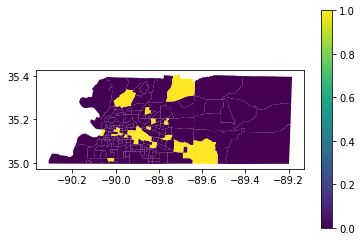

In [46]:
city_shp_merge[~city_shp_merge['exclusive'].isna()].plot(column = 'exclusive', legend=True)
plt.show()

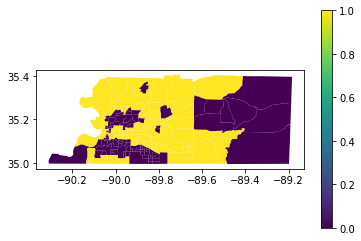

In [47]:
city_shp_merge[~city_shp_merge['proximity'].isna()].plot(column = 'proximity', legend=True)
plt.show()

#### Mortgage

In [48]:
temp = city_shp_merge.merge(mortgage, on = 'FIPS', how = 'left')
diff = temp['owneroccunits_x'] - temp['owneroccunits_y']
print(abs(diff).sum())

# diff = temp['renterocc_units'] - temp['renteroccunits']
print(abs(diff).sum())

diff = temp['per_rent_17_x'] - temp['per_rent_17_y']
print(abs(diff).sum())

0.0
0.0
10241.194


In [49]:
temp[['per_rent_17_x', 'per_rent_17_y']].head()

,per_rent_17_x,per_rent_17_y
0,0.824363,82.440002
1,0.619151,61.919998
2,0.519659,51.970001
3,0.524862,52.490002
4,0.402647,40.259998


In [50]:
city_shp_merge = city_shp_merge.merge(mortgage.drop(columns = ['owneroccunits', 'per_rent_17']), on = 'FIPS', how = 'left')
len(city_shp_merge)

232

#### Public housing

In [51]:
city_shp_merge = city_shp_merge.merge(pub_housing, on = 'FIPS', how = 'left')
len(city_shp_merge)
print(len(pub_housing))

147


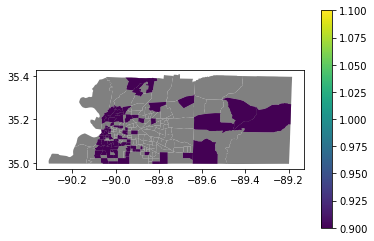

In [52]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['presence_ph_LIHTC'].isna()].plot(ax = ax, column = 'presence_ph_LIHTC', legend=True)
plt.show()

#### Prison

In [53]:
city_shp_merge = city_shp_merge.merge(prison, on = 'FIPS', how = 'left')
len(city_shp_merge)
print(len(prison))

291


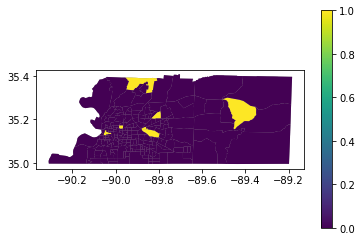

In [54]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['prison_flag'].isna()].plot(ax = ax, column = 'prison_flag', legend=True)
plt.show()

#### Low-income Home-ownership

In [55]:
city_shp_merge = city_shp_merge.merge(LI_HOW_flag, on = 'FIPS', how = 'left')
print(len(LI_HOW_flag))
LI_HOW_flag.head()

271


,FIPS,LItract,homeownership_rm_LItracts,aboverm_homeownership_LItracts
0,28033070101,0,69.160004,0.0
1,28033070102,0,69.160004,1.0
2,28033070210,0,69.160004,1.0
3,28033070221,0,69.160004,1.0
4,28033070222,0,69.160004,0.0


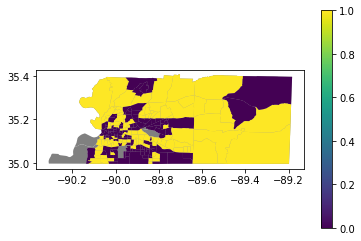

In [56]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['aboverm_homeownership_LItracts'].isna()].plot(ax = ax,
                                                                              column = 'aboverm_homeownership_LItracts',
                                                                              legend=True)
plt.show()

#### Foreclosure

In [57]:
city_shp_merge = city_shp_merge.merge(foreclosure, on = 'FIPS', how = 'left')
print(len(foreclosure))
foreclosure.head()

251


,FIPS,estimated_foreclosure_rate,rm_foreclosure_rate,aboverm_foreclosurerate
0,47047060100,5.9%,6.7,0
1,47047060200,5.5%,6.7,0
2,47047060300,6.3%,6.7,0
3,47047060400,3.1%,6.7,0
4,47047060500,5.2%,6.7,0


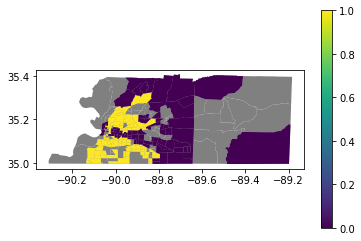

There are 58 NaN census tracts


In [58]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['aboverm_foreclosurerate'].isna()].plot(ax = ax,
                                                                              column = 'aboverm_foreclosurerate',
                                                                              legend=True)
plt.show()
print('There are',city_shp_merge['aboverm_foreclosurerate'].isna().sum(), 'NaN census tracts')

#### Neighborhood income
This includes 55% cut off for AMI predominance & 80-120 AMI cut offs

In [59]:
city_shp_merge = city_shp_merge.merge(neigh_income, on = 'FIPS', how = 'left')
len(city_shp_merge)

232

#### Vacancy

In [60]:
city_shp_merge = city_shp_merge.merge(vacancy, on = 'FIPS', how = 'left')
len(city_shp_merge)
vacancy.head()

,FIPS,vacancy_rate,rm_vacancy,vacancy_rm_flag
0,28033070101,0.042489,0.054311,0
1,28033070102,0.038944,0.054311,0
2,28033070210,0.000000,0.054311,0
3,28033070221,0.033001,0.054311,0
4,28033070222,0.000000,0.054311,0


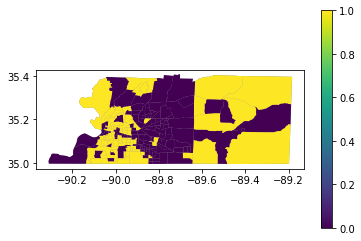

There are 0 NaN census tracts


In [61]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['vacancy_rm_flag'].isna()].plot(ax = ax, column = 'vacancy_rm_flag',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['vacancy_rm_flag'].isna().sum(), 'NaN census tracts')

#### Units vs HH

In [62]:
city_shp_merge = city_shp_merge.merge(housing_units, on = 'FIPS', how = 'left')
len(city_shp_merge)
housing_units.head()

,FIPS,A10008_001,A10001_001,T058_001,T068_001,change_units_2010_2017,per_change_HHs_2010_2017,per_change_units_2010_2017,flag_units_v_HHs,flag_rm_units_change
0,28033070101,1148,1318,1122,1254,64.0,2.317291,5.103668,0.0,1.0
1,28033070102,1420,1515,1449,1537,-22.0,-2.001380,-1.431360,0.0,0.0
2,28033070210,2469,2595,2309,2484,111.0,6.929407,4.468599,1.0,1.0
3,28033070221,1527,1606,1364,1469,137.0,11.950147,9.326072,1.0,1.0
4,28033070222,1639,1783,1673,1783,0.0,-2.032277,0.000000,0.0,0.0


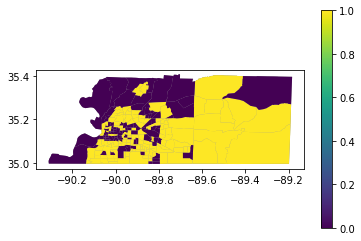

There are 0 NaN census tracts


In [63]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['flag_rm_units_change'].isna()].plot(ax = ax, column = 'flag_rm_units_change',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['flag_rm_units_change'].isna().sum(), 'NaN census tracts')

## Methodology changes - New Approach

### Load affordability Data

In [64]:
### Load file
raw_zillow_aff = pd.read_stata(folder + '0805_aff_ACSchange_zillowrecent_60120_55cut_newapproach.dta')

### Rename trtid10 to FIPS and reformat number
zillow_aff = mf.trtid10_to_FIPS(raw_zillow_aff)

### Keep only records for the census tracts defined in FIPS variable
zillow_aff['FIPS_temp']=zillow_aff['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
zillow_aff = zillow_aff[zillow_aff['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
zillow_aff = zillow_aff.drop(columns='FIPS_temp')

### Keep only relevant columns
zillow_aff = zillow_aff[['FIPS', 'lmh_flag_new', 'aff_change_cat_full',
                         'ab_30pct_ch', 'ab_50pct_ch', 'ab_90percentile_ch']]

zillow_aff.head()

['28033', '28093', '47047', '47157']


,FIPS,lmh_flag_new,aff_change_cat_full,ab_30pct_ch,ab_50pct_ch,ab_90percentile_ch
0,28033070101,mixed_mod,mixed_mod_rapid_increase,0.0,0.0,0.0
1,28033070102,mixed_mod,mixed_mod_rapid_increase,0.0,0.0,0.0
2,28033070210,predominantly MI,mod_marginal,0.0,0.0,0.0
3,28033070221,mixed_mod,mixed_mod_increase,0.0,0.0,0.0
4,28033070222,predominantly MI,mod_rapid_increase,0.0,0.0,0.0


#### Merge to city_shp_merge file

In [65]:
city_shp_merge = city_shp_merge.merge(zillow_aff, on = 'FIPS', how = 'left')
len(city_shp_merge)
zillow_aff.head()

,FIPS,lmh_flag_new,aff_change_cat_full,ab_30pct_ch,ab_50pct_ch,ab_90percentile_ch
0,28033070101,mixed_mod,mixed_mod_rapid_increase,0.0,0.0,0.0
1,28033070102,mixed_mod,mixed_mod_rapid_increase,0.0,0.0,0.0
2,28033070210,predominantly MI,mod_marginal,0.0,0.0,0.0
3,28033070221,mixed_mod,mixed_mod_increase,0.0,0.0,0.0
4,28033070222,predominantly MI,mod_rapid_increase,0.0,0.0,0.0


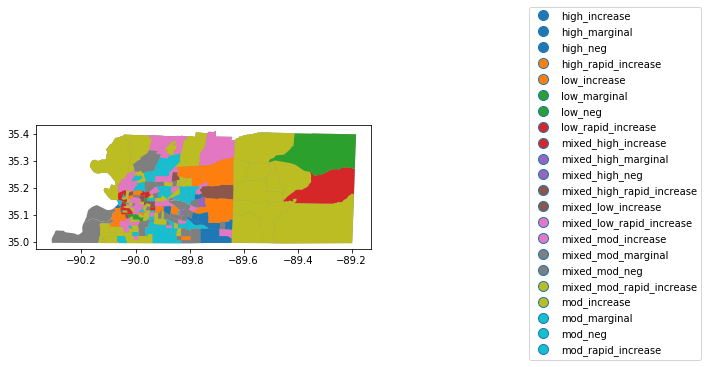

In [66]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[city_shp_merge['aff_change_cat_full']!='data unavailable'].plot(ax = ax, column = 'aff_change_cat_full',
                                                                        legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0, 0, 2, 2))
plt.show()
print('There are',city_shp_merge['aff_change_cat_full'].isna().sum(), 'NaN census tracts')

### Load Rail Variables

In [67]:
### Load file
raw_rail = pd.read_stata(folder + 'Memphis_Rail_02052019.dta')

### Rename trtid10 to FIPS and reformat number
raw_rail = raw_rail.rename(columns = {'geoid':'trtid10'})
rail = mf.trtid10_to_FIPS(raw_rail)

### Keep only relevant columns
rail = rail[['FIPS', 'rail', 'shape_length', 'shape_area']]

rail.head()

There are 0 NaN census tracts


,FIPS,rail,shape_length,shape_area
0,47001020100,0.0,0.207342,0.001383
1,47001020201,0.0,0.259031,0.002801
2,47001020202,0.0,0.175998,0.000897
3,47001020300,0.0,0.107503,0.000471
4,47001020400,0.0,0.208114,0.001067


#### Merge with city_shp_merge

In [68]:
city_shp_merge = city_shp_merge.merge(rail, on = 'FIPS', how = 'left')
len(city_shp_merge)

232

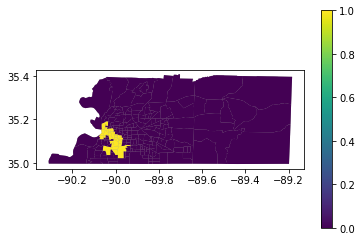

There are 0 NaN census tracts


In [69]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['rail'].isna()].plot(ax = ax, column = 'rail',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['rail'].isna().sum(), 'NaN census tracts')

### Load Low Income Immigration

In [70]:
raw_LI_immigration = pd.read_stata(folder + 'Memphis_2010_mover_interpolated.dta')

### Rename trtid10 to FIPS and reformat number
LI_immigration = mf.trtid10_to_FIPS(raw_LI_immigration)

LI_immigration.head()

,FIPS,reg_medinc_10,moveinincd_10,per_limove_10
0,28001000100,21385.0,163.0,0.373730
1,28001000200,21385.0,189.0,0.761103
2,28001000300,21385.0,102.0,0.767353
3,28001000400,21385.0,196.0,0.835437
4,28001000500,21385.0,158.0,0.430380


#### Merge with city_shp_merge

In [71]:
city_shp_merge = city_shp_merge.merge(LI_immigration, on = 'FIPS', how = 'left')
len(city_shp_merge)

232

### Anchor Institutions

In [72]:
raw_anchor = pd.read_stata(folder + 'RR_042919.dta')

### Rename trtid10 to FIPS and reformat number
anchor = mf.trtid10_to_FIPS(raw_anchor)

### Keep only relevant columns
anchor = anchor[['FIPS', 'hosp_fl', 'uni_fl']]

### Create dummy for anchor institutions
df = anchor
df['anchor_institution'] = 0
df.loc[(df['hosp_fl'] == 1)|(df['uni_fl'] == 1), 'anchor_institution'] = 1

### Keep only records for the census tracts defined in FIPS variable
anchor['FIPS_temp']=zillow_aff['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
anchor = anchor[anchor['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
anchor = anchor.drop(columns='FIPS_temp')

anchor.head()

['28033', '28093', '47047', '47157']


,FIPS,hosp_fl,uni_fl,anchor_institution
0,13057090100,0.0,0.0,0
1,13057090200,0.0,1.0,1
2,13057090300,0.0,0.0,0
3,13057090400,0.0,0.0,0
4,13057090501,0.0,0.0,0


#### Merge with city_shp_merge

In [73]:
city_shp_merge = city_shp_merge.merge(anchor, on = 'FIPS', how = 'left')
len(anchor)

271

In [74]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'hinc_00',
 'pop_00',
 'nhwhite_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'hh_00',
 'hu_00',
 'ohu_00',
 'rhu_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'col_00',
 'per_col_00',
 'per_carcommute_00',
 'per_rent_00',
 '_merge_00',
 'mrent_90',
 'mhval_90',
 'rentocc_90',
 'ownocc_90',
 '_merge_90',
 'pop_90',
 'nhwhite_90',
 'nhblk_90',
 'asian_90',
 'hisp_90',
 'hh_90',
 'hinc_90',
 'hu_90',
 'ohu_90',
 'rhu_90',
 'per_nonwhite_90',
 'per_nhblk_90',
 'per_hisp_90',
 'per_asian_90',
 'col_90',
 'per_col_90',
 'per_carcommute_90',
 'per_rent_90',
 'units_pre50_90',
 'per_units_pre50_90',
 '_merge_17',
 'pop_17',
 'pop_17_se',
 'nhwhite_17',
 'hh_17',
 'hinc_17',
 'hinc_17_se',
 'hu_17',
 'ohu_17',
 'rhu_17',
 'hu_17_se',
 'rhu_17_se',
 'mrent_17',
 'mrent_17_se',
 'mhval_17',
 'mhval_17_se',
 'per_nonwhite_17',
 'per_nhblk_17',
 'per_hisp_17',
 'per_asian_17',
 'col_17',
 'per_col_17',
 'per_carcommute_17',
 'hhwchild

## Additional Data Processing

In [75]:
# list(city_shp_merge.columns)

##### Ownership Variables

In [76]:
city_shp_merge['per_owners_90'] = city_shp_merge['ohu_90']/city_shp_merge['hu_90']*100
city_shp_merge['per_owners_00'] = city_shp_merge['ohu_00']/city_shp_merge['hu_00']*100
city_shp_merge['per_owners_17'] = city_shp_merge['ohu_17']/city_shp_merge['hu_17']*100

##### Index US$ to 2017

In [77]:
# raw_int_output = pd.read_stata(folder + 'joined_data_030619_cleaned.dta')

# CPI_90_16 = raw_int_output['real_hinc_90']/raw_int_output['hinc_90']
# print(CPI_90_16.unique())
# CPI_90_16 = 1.83632 ### this is manually inputed based on print

# CPI_00_16 = raw_int_output['real_hinc_00']/raw_int_output['hinc_00']
# print(CPI_00_16.unique())
# CPI_00_16 = 1.39377 ### this is manually inputed based on print

# CPI_16_17 = 1.0213
# CPI_90_17 = CPI_90_16*CPI_16_17
# CPI_00_17 = CPI_00_16*CPI_16_17

# print ('The CPI 1990-2016 is ', str(CPI_90_16))
# print ('The CPI 2000-2016 is ', str(CPI_00_16))
# print ('The CPI 2016-2017 is ', str(CPI_16_17))
# print ('The CPI 1990-2017 is ', str(CPI_90_17))
# print ('The CPI 2000-2017 is ', str(CPI_00_17))
# raw_int_output[['trtid10', 'real_hinc_90', 'hinc_90']].head()

### OTHER VARIABLES THAT NEED TO BE FOUND IN ORIGINAL DATASETS

In [78]:
# ### These variables needed to be pulled out of the original merge file, because they're not incorporated here
# ### Rename trtid10 to FIPS and reformat number
# int_output_merge = mf.trtid10_to_FIPS(raw_int_output)

# columns = ['FIPS', 'mhval_90', 'mrent_90', 'mhval_00', 'mrent_00', 'hh_00', 'hh_90', 'tot_jobs', 'larea',
#            'per_col_00', 'per_col_90', 'per_rent_90', 'per_rent_00']
# city_shp_merge = city_shp_merge.merge(int_output_merge[columns], on = 'FIPS', how = 'left')

# ### per rent is loaded with the mortgage data
# columns = ['FIPS', 'pop_17', 'pop_17_se', 'hh_17', 'pop_90', 'mhval_17', 'mhval_17_se',
#            'mrent_17', 'mrent_17_se', 'per_rent_17_se', 'per_col_17', 'per_col_17_se',
#            'rhu_17', 'rhu_17_se', 'hu_17', 'hinc_17_se', 'per_nonwhite_17', 'per_units_pre50_17', 'per_built_00_17',
#         'per_nhblk_17', 'per_asian_17', 'per_hisp_17']

# city_shp_merge = city_shp_merge.merge(output[columns], on = 'FIPS', how = 'left')

# len(city_shp_merge)

In [79]:
# city_shp_merge = city_shp_merge.merge(output[['FIPS', 'hinc_17_se']], on = 'FIPS', how = 'left')
# city_shp_merge.head()

In [80]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'hinc_00',
 'pop_00',
 'nhwhite_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'hh_00',
 'hu_00',
 'ohu_00',
 'rhu_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'col_00',
 'per_col_00',
 'per_carcommute_00',
 'per_rent_00',
 '_merge_00',
 'mrent_90',
 'mhval_90',
 'rentocc_90',
 'ownocc_90',
 '_merge_90',
 'pop_90',
 'nhwhite_90',
 'nhblk_90',
 'asian_90',
 'hisp_90',
 'hh_90',
 'hinc_90',
 'hu_90',
 'ohu_90',
 'rhu_90',
 'per_nonwhite_90',
 'per_nhblk_90',
 'per_hisp_90',
 'per_asian_90',
 'col_90',
 'per_col_90',
 'per_carcommute_90',
 'per_rent_90',
 'units_pre50_90',
 'per_units_pre50_90',
 '_merge_17',
 'pop_17',
 'pop_17_se',
 'nhwhite_17',
 'hh_17',
 'hinc_17',
 'hinc_17_se',
 'hu_17',
 'ohu_17',
 'rhu_17',
 'hu_17_se',
 'rhu_17_se',
 'mrent_17',
 'mrent_17_se',
 'mhval_17',
 'mhval_17_se',
 'per_nonwhite_17',
 'per_nhblk_17',
 'per_hisp_17',
 'per_asian_17',
 'col_17',
 'per_col_17',
 'per_carcommute_17',
 'hhwchild

In [81]:
### The input file originally used had 1990 data in US$1990
### hinc_90 is in US$ 19990
### real_hinc_90 is in US$ 2016 - for the output
### Because we're using 2017 data, we care about 2017 $

# city_shp_merge['real_hinc_90'] = city_shp_merge['hinc_90']*CPI_90_17
# city_shp_merge['real_mhval_90'] = city_shp_merge['mhval_90']*CPI_90_17
# city_shp_merge['real_mrent_90'] = city_shp_merge['mrent_90']*CPI_90_17

# city_shp_merge['real_hinc_00'] = city_shp_merge['hinc_00']*CPI_00_17
# city_shp_merge['real_mhval_00'] = city_shp_merge['mhval_00']*CPI_00_17
# city_shp_merge['real_mrent_00'] = city_shp_merge['mrent_00']*CPI_00_17

# #### ***** Theses variables are missing because the tenure file is also missing ****
# #### They were included from the output file, but this needs to be fixed

# city_shp_merge['real_hinc_17'] = city_shp_merge['hinc_17']
# city_shp_merge['real_mhval_17'] = city_shp_merge['mhval_17']
# city_shp_merge['real_mrent_17'] = city_shp_merge['mrent_17']


city_shp_merge['real_mhval_10'] = city_shp_merge['mhval_10']
city_shp_merge['real_mrent_10'] = city_shp_merge['mrent_10']

# city_shp_merge[['FIPS', 'real_hinc_90', 'hinc_90', 'real_mhval_90', 'mhval_90', 'real_mrent_90', 'mrent_90']].head()

##### Flag VLI tracts

In [82]:
#### Renamed the variables ---- WHY?
# city_shp_merge = city_shp_merge.rename(columns = {'vli2017':'vli_17',
#                                                   'vli2000':'vli_00',
#                                                   'vli1990':'vli_90',
#                                                   'li1990':'li_90',
#                                                   'li2000':'li_00',
#                                                   'li2017':'li_17'})

df = city_shp_merge
df['vli_flag'] = 0
df.loc[(df['vli_17'] > 0.5), 'vli_flag'] = 1

# # #### Weird thing about OLD LI data is that OLD li=50-80% AMI since vli=<50%AMI, need a var for all<80%
# df['per_all_li_17'] = df['vli_17'] + df['li_17']
# df['per_all_li_17'] = np.where((df['vli_17'].isna())&(df['li_17'].isna()), np.nan, df['per_all_li_17'])
# df['per_all_li_00'] = df['vli_00'] + df['li_00']
# df['per_all_li_00'] = np.where((df['vli_00'].isna())&(df['li_00'].isna()), np.nan, df['per_all_li_00'])
# df['per_all_li_90'] = df['vli_90'] + df['li_90']
# df['per_all_li_90'] = np.where((df['vli_90'].isna())&(df['li_90'].isna()), np.nan, df['per_all_li_90'])

# #*The OLD low-inc vars are also proportions, so need to make them counts
# #### ***** HH data needs to be uploaded *****
# df['all_li_count_17'] = df['per_all_li_17']*df['hh_17']
# df['all_li_count_00'] = df['per_all_li_00']*df['hh_00']
# df['all_li_count_90'] = df['per_all_li_90']*df['hh_90']

# print(df['per_all_li_17'].isna().sum())
# print(df['vli_17'].isna().sum())
# print(df['li_17'].isna().sum())

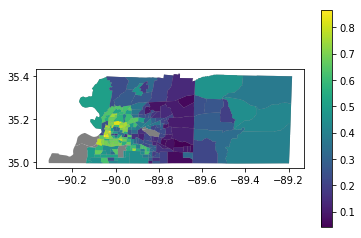

There are 5 NaN census tracts


In [83]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['per_all_li_17'].isna()].plot(ax = ax, column = 'per_all_li_17',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['per_all_li_17'].isna().sum(), 'NaN census tracts')

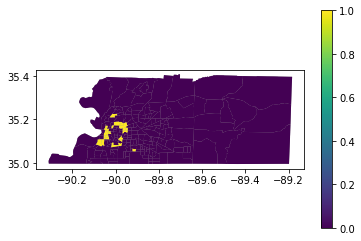

There are 0 NaN census tracts


In [84]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['vli_flag'].isna()].plot(ax = ax, column = 'vli_flag',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['vli_flag'].isna().sum(), 'NaN census tracts')

##### Population flag and other pop data

In [85]:
df = city_shp_merge

### Create population dummy, 1 for pop >= 500
df['popflag17'] = np.where(df['pop_17']<500, 0, 1)

### Old income measures - what is this?
weight_inc = (df['hinc_17']*(df['pop_17']/8522948)).sum() ### What is this and what is 8,522,948
print(weight_inc)
print(df['hinc_17'].describe())
print(df['hinc_17'][df['hinc_17']<=79000].describe())  ### Why is this showing?

# ** POPLOSS & VLI FLAG
df['poploss_90_00'] = df['pop_00'] - df['pop_90']
df['poploss_00_17'] = df['pop_17'] - df['pop_00']
df['poploss_90_17'] = df['pop_17'] - df['pop_90']

df['pctch_poploss_90_00'] = (df['pop_00'] - df['pop_90'])/df['pop_90']
df['pctch_poploss_00_17'] = (df['pop_17'] - df['pop_00'])/df['pop_00']
df['pctch_poploss_90_17'] = (df['pop_17'] - df['pop_90'])/df['pop_90']

city_shp_merge.head()

6368.454312404581
count       227.000000
mean      48706.409692
std       28337.443578
min       10871.000000
25%       26339.500000
50%       41228.000000
75%       64739.500000
max      165679.000000
Name: hinc_17, dtype: float64
count      196.000000
mean     40098.188776
std      17963.533668
min      10871.000000
25%      25208.250000
50%      36053.500000
75%      55324.750000
max      75962.000000
Name: hinc_17, dtype: float64


,FIPS,COUNTYFP,geometry,hinc_00,pop_00,nhwhite_00,nhblk_00,asian_00,hisp_00,hh_00,...,per_owners_00,per_owners_17,real_mhval_10,real_mrent_10,poploss_90_00,poploss_00_17,poploss_90_17,pctch_poploss_90_00,pctch_poploss_00_17,pctch_poploss_90_17
0,47157000200,157,"POLYGON ((-90.049055 35.16613299999999, -90.04...",11361.875766,1532.000000,0.00000,1527.000000,0.000000,5.00000,570.000000,...,23.177570,17.563739,59200.0,585.0,-713.999974,-841.000000,-1554.999974,-0.317898,-0.548956,-0.692342
1,47157000800,157,"POLYGON ((-89.98362499999999 35.174497, -89.98...",22039.301185,3402.000000,88.00000,3301.000000,0.000000,0.00000,1213.000000,...,50.777202,38.084875,50400.0,658.0,-937.768894,-1002.000000,-1939.768894,-0.216087,-0.294533,-0.446975
2,47157003500,157,"POLYGON ((-90.021001 35.129804, -90.0208289999...",67319.654271,3101.000000,2574.00000,356.000000,94.000000,61.00000,1572.000000,...,47.964377,48.034076,270500.0,666.0,-90.999941,70.000000,-20.999941,-0.028509,0.022573,-0.006579
3,47157005900,157,"POLYGON ((-90.047072 35.11587, -90.040992 35.1...",20340.070142,3908.163476,240.82521,3550.423122,34.974616,54.96011,1304.053525,...,44.088482,47.513812,57800.0,555.0,-642.533646,-1468.163476,-2110.697122,-0.141195,-0.375666,-0.463818
4,47157007500,157,"POLYGON ((-90.03931399999999 35.097482, -90.03...",36268.663670,1745.000000,29.00000,1716.000000,0.000000,0.00000,619.000000,...,71.974522,59.735350,60100.0,648.0,-338.880837,-275.000000,-613.880837,-0.162620,-0.157593,-0.294585


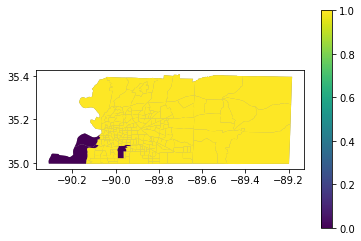

There are 0 NaN census tracts


In [86]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['popflag17'].isna()].plot(ax = ax, column = 'popflag17',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['popflag17'].isna().sum(), 'NaN census tracts')

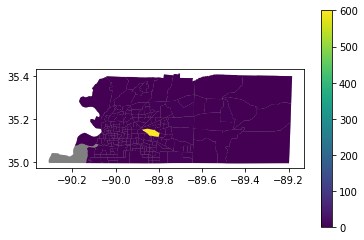

There are 1 NaN census tracts


In [87]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['pctch_poploss_00_17'].isna()].plot(ax = ax, column = 'pctch_poploss_00_17',
                                                                        legend=True)
plt.show()
print('There are',city_shp_merge['pctch_poploss_00_17'].isna().sum(), 'NaN census tracts')

#### Employment Density & Housing Unit Density

In [88]:
df = city_shp_merge

### Employment & Housing Unit Density
df['empd_17'] = df['tot_jobs']/df['larea']
df['density_17'] = df['hu_17']/df['larea']

C:\Users\Gaby\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


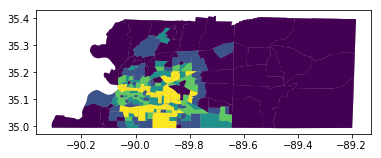

There are 0 NaN census tracts


In [89]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['empd_17'].isna()].plot(ax = ax, column = 'empd_17', scheme = 'quantiles')
plt.show()
print('There are',city_shp_merge['empd_17'].isna().sum(), 'NaN census tracts')

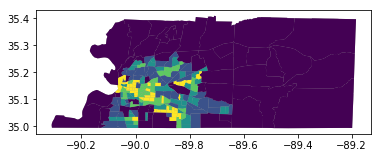

There are 0 NaN census tracts


In [90]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['density_17'].isna()].plot(ax = ax, column = 'density_17', scheme = 'quantiles')
plt.show()
print('There are',city_shp_merge['density_17'].isna().sum(), 'NaN census tracts')

#### Some variation coefficients

In [91]:
### Variation Coefficient
### House value 2017
# df['mhval_17_cv'] = df['mhval_17_se']/df['mhval_17']
df['mhval_17_flag15'] = np.where(df['mhval_17_cv']>.15, 1, 0)
df['mhval_17_flag30'] = np.where(df['mhval_17_cv']>.30, 1, 0)

### House rent 2017
# df['mrent_17_cv'] = df['mrent_17_se']/df['mrent_17']
df['mrent_17_flag15'] = np.where(df['mrent_17_cv']>.15, 1, 0)
df['mrent_17_flag30'] = np.where(df['mrent_17_cv']>.30, 1, 0)

### Percentage of renters 2017
# df['per_rent_17_cv'] = df['per_rent_17_se']/df['per_rent_17']
df['per_rent_17_flag15'] = np.where(df['per_rent_17_cv']>.15, 1, 0)
df['per_rent_17_flag30'] = np.where(df['per_rent_17_cv']>.30, 1, 0)

### Percentage COL 2017 - what is this?!
# df['per_col_17_cv'] = df['per_col_17_se']/df['per_col_17']
df['per_col_17_flag15'] = np.where(df['per_col_17_cv']>.15, 1, 0)
df['per_col_17_flag30'] = np.where(df['per_col_17_cv']>.30, 1, 0)

### RHU 2017 - what is this?!
df['rhu_17_cv'] = df['rhu_17_se']/df['rhu_17']
df['rhu_17_flag15'] = np.where(df['rhu_17_cv']>.15, 1, 0)
df['rhu_17_flag30'] = np.where(df['rhu_17_cv']>.30, 1, 0)

### Population 2017
# df['pop_17_cv'] = df['pop_17_se']/df['pop_17']
df['pop_17_flag15'] = np.where(df['pop_17_cv']>.15, 1, 0)
df['pop_17_flag30'] = np.where(df['pop_17_cv']>.30, 1, 0)

### HH Income 2017
df['hinc_17_cv'] = df['hinc_17_se']/df['hinc_17']
df['hinc_17_flag15'] = np.where(df['hinc_17_cv']>.15, 1, 0)
df['hinc_17_flag30'] = np.where(df['hinc_17_cv']>.30, 1, 0)

In [92]:
city_shp_merge[['mhval_17_cv', 'per_rent_17_cv', 'per_col_17_cv', 'rhu_17_cv', 'pop_17_cv', 'hinc_17_cv']].describe()

,mhval_17_cv,per_rent_17_cv,per_col_17_cv,rhu_17_cv,pop_17_cv,hinc_17_cv
count,219.000000,227.000000,229.000000,232.000000,230.000000,227.000000
mean,0.073996,0.008680,0.007843,inf,0.074801,0.109210
std,0.066790,0.004188,0.004167,NaN,0.066240,0.047129
min,0.012855,0.001947,0.002186,0.031529,0.018203,0.034722
25%,0.033732,0.005739,0.005575,0.098477,0.052672,0.075202
50%,0.052810,0.008101,0.006798,0.131210,0.066255,0.099570
75%,0.085397,0.010528,0.008835,0.175710,0.086915,0.136057
max,0.586145,0.032083,0.035319,inf,0.999181,0.278938


In [93]:
city_shp_merge[['pop_17', 'rhu_17']].describe()

,pop_17,rhu_17
count,232.000000,232.000000
mean,4211.995690,676.978448
std,2379.876908,484.466685
min,0.000000,0.000000
25%,2587.750000,345.250000
50%,3928.500000,580.500000
75%,5433.250000,907.750000
max,16856.000000,2687.000000


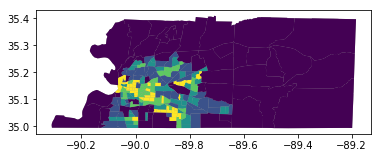

There are 0 NaN census tracts


In [94]:
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['density_17'].isna()].plot(ax = ax, column = 'density_17', scheme = 'quantiles')
plt.show()
print('There are',city_shp_merge['density_17'].isna().sum(), 'NaN census tracts')

#### Income breakdowns for year 2000

In [95]:
raw_income_group = pd.read_stata(folder + '2000_incomedata.dta')
raw_income_group.columns

### Not going to use the countymedian_income. Will ue region median income instead.
### This value is provided in "inc_groups_hh by income_testing cutoffs_053119"
### Madeline defined RMI for 2017, but not for 2000 - how did she do it?

Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT', 'T090_001',
       'T090_002', 'T090_003', 'T090_004', 'T090_005', 'T090_006', 'T090_007',
       'T090_008', 'T090_009', 'T090_010', 'T090_011', 'T090_012', 'T090_013',
       'T090_014', 'T090_015', 'T090_016', 'T090_017'],
      dtype='object')

In [96]:
# raw_income_2000 = pd.read_stata(folder + '2000_income_data.dta')  ### Is this 2000_a.dta??
# raw_income_2000.columns

# * File 2000_income_data which will be used for interpolation doesn't have a ///
# * medium household income var ("med_inc" in neighborhood income code) which is ///
# * needed for mix-low  & mix-mod creation
# ** merge hhinc file to 2000_incomedata file, save, and run again  --- What this already done?! --- I'm confused

In [97]:
### This is supposed to contain HH income for 2017, but it only has 2016 data
### Apparently it doesn't matter bc I only care about 2000 data? This is weird
raw_income_region = pd.read_stata(folder + 'hhinc_singleregion.dta')

### Rename trtid10 to FIPS and reformat number
income_region = mf.trtid10_to_FIPS(raw_income_region)

### Keep only relevant columns
income_region = income_region[['FIPS', 'hinc_00']]

### Keep only records for the census tracts defined in FIPS variable
income_region['FIPS_temp']=income_region['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
income_region = income_region[income_region['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
income_region = income_region.drop(columns='FIPS_temp')

### Following the code
# income_group = raw_income_group.drop(columns = ['_merge'])
income_group = raw_income_group.merge(income_region, on = 'FIPS', how = 'left')

### Keep only relevant columns
# income_group = income_group.drop(columns = ['AREALAND', 'AREAWATR', 'SUMLEV', 'GEOCOMP', 'REGION', 'DIVISION'])

### Rename variables
income_group = income_group.rename(columns = {'hinc_00':'med_inc',
                                              'T090_001':'denominator_00', ### What is this number? - Total HH?
                                              'T090_002':'I_10000',
                                              'T090_003':'I_15000',
                                              'T090_004':'I_20000',
                                              'T090_005':'I_25000',
                                              'T090_006':'I_30000',
                                              'T090_007':'I_35000',
                                              'T090_008':'I_40000',
                                              'T090_009':'I_45000',
                                              'T090_010':'I_50000',
                                              'T090_011':'I_60000',
                                              'T090_012':'I_75000',
                                              'T090_013':'I_100000',
                                              'T090_014':'I_125000',
                                              'T090_015':'I_150000',
                                              'T090_016':'I_200000',
                                              'T090_017':'I_201'})
income_group.columns

['28033', '28093', '47047', '47157']


Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT',
       'denominator_00', 'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000',
       'I_35000', 'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000',
       'I_100000', 'I_125000', 'I_150000', 'I_200000', 'I_201', 'med_inc'],
      dtype='object')

In [98]:
# list(city_shp_merge.columns)

In [99]:
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '60000', '75000',
          '100000', '125000', '150000', '200000']
column = ['FIPS', 'denominator_00']
for i in number:
#     print(i)
    column.append('I_'+i)

# print(column)

income_group[column].head()

,FIPS,denominator_00,I_10000,I_15000,I_20000,I_25000,I_30000,I_35000,I_40000,I_45000,I_50000,I_60000,I_75000,I_100000,I_125000,I_150000,I_200000
0,28033070101,808.417601,66.460074,48.219253,50.391045,36.488872,59.510479,40.399840,70.374371,56.036715,40.400988,67.769851,109.029066,107.297578,28.670033,6.950168,9.557213
1,28033070102,1052.668140,86.543915,62.786762,65.614994,47.514306,77.493571,52.605125,91.634733,72.968399,52.605125,88.240854,141.977272,139.714686,37.332669,9.050344,12.444223
2,28033070210,996.033851,50.002783,56.002019,30.002110,41.001528,57.002492,64.001692,24.002947,77.002347,37.001692,115.002838,151.004566,210.004493,33.001201,22.000291,15.000400
3,28033070221,1265.267698,72.457253,70.406576,75.875048,123.724178,111.420116,82.710638,58.786074,42.380658,114.837911,78.609284,197.548549,147.648743,47.165571,19.823211,10.253385
4,28033070222,585.638916,33.537399,32.588227,35.119352,57.266690,51.571660,38.283257,27.209588,19.616214,53.153613,36.384914,91.436870,68.340360,21.830948,9.175326,4.745858


#### Determining AMI - Look at other code

In [100]:
# ****** DETERMINING AMI *********
# * issue - how do I assign AMI - use Madeline's median of median method (mentioned in Neighb income read.me)
# * accidentally deleted a file from Neighb Income Level Archive file while looking for median-of-tract-medians method
# * intended to run my own median-of-medians method to determine 2000 AMI >> Do file to be found in:
# 	* Typologies > Master Datasets > Updated Typologies Summer 2019 ///
# 		* > Accessory Typology Processing> Regional AMIs - Median of Medians Method

# *Kamene definition: Atlanta - $ 51,760.11
# *Kamene definition: Chicago - $ 42,917
# *Kamene definition: Denver - $ 65,785.05
# *Kamene definition: Memphis - $ 44,560.60


# * CODE from Income Interpolation 1990 2000 2016.do
reg_med_inc_00 = 44560.60

#### Creates income cutoffs

In [101]:
income_group.describe()

,denominator_00,I_10000,I_15000,I_20000,I_25000,I_30000,I_35000,I_40000,I_45000,I_50000,I_60000,I_75000,I_100000,I_125000,I_150000,I_200000,I_201,med_inc
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,1481.437036,169.003704,93.637037,93.318518,98.555556,97.637037,96.011111,88.774074,82.692593,71.507407,129.629630,153.137037,143.685185,69.685185,30.096296,29.303704,34.762963,53958.932607
std,623.134424,151.069996,71.469409,64.662094,65.505699,62.047756,59.710265,53.827631,51.470633,43.639992,81.022760,101.373647,116.636253,75.722511,44.002201,47.664046,72.638342,33823.417073
min,0.000418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.425485
25%,1028.151991,53.000000,34.821368,43.500000,47.859533,50.007084,52.989163,47.000000,45.000000,40.550741,74.407720,78.584781,58.598492,19.000000,6.000000,4.105995,5.894459,31689.076259
50%,1406.364712,115.234538,75.500000,77.000000,84.000000,84.939185,83.000000,80.933804,73.077558,67.996098,117.600881,133.077397,119.423792,41.539055,14.047180,14.062050,13.405917,44560.599510
75%,1876.000000,250.357203,137.824526,126.972122,135.750000,139.174623,131.000000,120.344629,113.825179,102.769070,174.575467,217.218054,194.469525,86.304343,36.103469,31.854609,31.100432,67703.088618
max,3041.288985,686.000000,434.000000,316.000000,345.000000,279.000000,307.319709,269.086324,246.575804,224.000000,408.000000,506.062736,562.733808,422.000000,348.000000,311.000000,729.000000,262707.893747


In [102]:
### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '60000', '75000',
          '100000', '125000', '150000', '200000']
column = list()
for i in number:
    print(i)
    column.append('prop_'+i)
    income_group['prop_'+i] = income_group['I_'+i]/income_group['denominator_00']
print(column)

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000
200000
['prop_10000', 'prop_15000', 'prop_20000', 'prop_25000', 'prop_30000', 'prop_35000', 'prop_40000', 'prop_45000', 'prop_50000', 'prop_60000', 'prop_75000', 'prop_100000', 'prop_125000', 'prop_150000', 'prop_200000']


###### Determines 80% cutoff

In [103]:
### 80% cutoff of the regional median income
df = income_group
reg_med_inc80_00 = 0.8*reg_med_inc_00
print(reg_med_inc80_00)

df['inc80_cumulative'] = 0
df['inc80_00'] = 0

### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000']
for i in number:
    a = int(i)
    b = a + 4999.99
    prop = str(int(i) + 5000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['50000']
for i in number:
    a = int(i)
    b = a + 9999.99
    prop = str(int(i) + 10000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['60000']
for i in number:
    a = int(i)
    b = a + 14999.99
    prop = str(int(i) + 15000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['75000', '100000', '125000']
for i in number:
    a = int(i)
    b = a + 24999.99
    prop = str(int(i) + 25000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)

number = ['150000']
for i in number:
    a = int(i)
    b = a + 49999.99
    prop = str(int(i) + 50000)
    df['inc80_cumulative'] = df['inc80_cumulative']+df['prop_'+i]
    
    if (reg_med_inc80_00>=a)&(reg_med_inc80_00 <b):
        df['inc80_00'] = ((reg_med_inc80_00 - a)/(b-a))*df['prop_'+prop] + df['inc80_cumulative']
    print(i)
    
df = df.drop(columns = ['inc80_cumulative'])

35648.48
10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000


###### Determines 120% cutoff

In [104]:
df = income_group
reg_med_inc120_00 = 1.2*reg_med_inc_00

df['inc120_cumulative'] = 0
df['inc120_00'] = 0


### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000']
for i in number:
    a = int(i)
    b = a + 4999.99
    prop = str(int(i) + 5000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['50000']
for i in number:
    a = int(i)
    b = a + 9999.99
    prop = str(int(i) + 10000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['60000']
for i in number:
    a = int(i)
    b = a + 14999.99
    prop = str(int(i) + 15000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['75000', '100000', '125000']
for i in number:
    a = int(i)
    b = a + 24999.99
    prop = str(int(i) + 25000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)

number = ['150000']
for i in number:
    a = int(i)
    b = a + 49999.99
    prop = str(int(i) + 50000)
    df['inc120_cumulative'] = df['inc120_cumulative']+df['prop_'+i]
    
    if (reg_med_inc120_00>=a)&(reg_med_inc120_00 <b):
        df['inc120_00'] = ((reg_med_inc120_00 - a)/(b-a))*df['prop_'+prop] + df['inc120_cumulative']
    print(i)
    
df = df.drop(columns = ['inc120_cumulative'])

10000
15000
20000
25000
30000
35000
40000
45000
50000
60000
75000
100000
125000
150000


###### Generate share of each income group

In [105]:
income_group['low_80120_00'] = income_group['inc80_00']
income_group['mod_80120_00'] = income_group['inc120_00'] - income_group['inc80_00']
income_group['high_80120_00'] = 1 - income_group['inc120_00']
income_group.head(3)

,FIPS,NAME,QName,NATION,STATE,COUNTY,CT,denominator_00,I_10000,I_15000,...,prop_125000,prop_150000,prop_200000,inc80_cumulative,inc80_00,inc120_cumulative,inc120_00,low_80120_00,mod_80120_00,high_80120_00
0,28033070101,Census Tract 701.01,"Census Tract 701.01, DeSoto County, Mississippi",00,28,033,070101,808.417601,66.460074,48.219253,...,0.035464,0.008597,0.011822,0.974742,0.384203,0.974742,0.608369,0.384203,0.224166,0.391631
1,28033070102,Census Tract 701.02,"Census Tract 701.02, DeSoto County, Mississippi",00,28,033,070102,1052.668140,86.543915,62.786762,...,0.035465,0.008598,0.011822,0.974745,0.384208,0.974745,0.608369,0.384208,0.224161,0.391631
2,28033070210,Census Tract 702.10,"Census Tract 702.10, DeSoto County, Mississippi",00,28,033,070210,996.033851,50.002783,56.002019,...,0.033133,0.022088,0.015060,0.970884,0.302325,0.970884,0.477852,0.302325,0.175527,0.522148


In [106]:
income_group[['FIPS', 'low_80120_00', 'mod_80120_00', 'high_80120_00']].head()

,FIPS,low_80120_00,mod_80120_00,high_80120_00
0,28033070101,0.384203,0.224166,0.391631
1,28033070102,0.384208,0.224161,0.391631
2,28033070210,0.302325,0.175527,0.522148
3,28033070221,0.430121,0.186268,0.383611
4,28033070222,0.430121,0.186268,0.383611


In [107]:
### Excludes CT without data
### According to stata code comment, I should have 25 CT without data, but I have zero

df = income_group
df['validsample'] = np.where((df['inc80_00'] == 0)|(df['inc120_00'] == 0), 0, 1)
df['validsample'].describe()

count    271.000000
mean       0.992620
std        0.085748
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: validsample, dtype: float64

In [108]:
df = income_group

### Low income
df['low_pdmt_80120'] = np.where((df['low_80120_00']>=0.5)&(df['mod_80120_00']<0.4)&(df['high_80120_00']<0.4),1,0)
df['low_pdmt_80120'][df['validsample']==0] = 0

## High income
df['high_pdmt_80120'] = np.where((df['low_80120_00']<0.4)&(df['mod_80120_00']<0.4)&(df['high_80120_00']>=0.5),1,0)
df['high_pdmt_80120'][df['validsample']==0] = 0

### Moderate income
df['mod_pdmt_80120'] = np.where((df['low_80120_00']<0.4)&(df['mod_80120_00']>=0.5)&(df['high_80120_00']<0.4),1,0)
df['mod_pdmt_80120'][df['validsample']==0] = 0

### Mixed-Low income
df['mix_low_80120'] = np.where((df['low_80120_00']>=0.4)&(df['mod_80120_00']<0.35)&(df['high_80120_00']<0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_low_80120'][df['validsample']==0] = 0
### Mixed-Moderate income
df['mix_mod_80120'] = np.where((df['low_80120_00']<0.35)&(df['mod_80120_00']>=0.4)&(df['high_80120_00']<0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_mod_80120'][df['validsample']==0] = 0

### Mixed-High income
df['mix_high_80120'] = np.where((df['low_80120_00']<0.35)&(df['mod_80120_00']<0.35)&(df['high_80120_00']>=0.4)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0),1,0)
df['mix_high_80120'][df['validsample']==0] = 0

### Mixed-Low-Mod income
df['mix_l_m_80120'] = np.where((df['low_80120_00']>=0.35)&(df['mod_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_l_m_80120'][df['validsample']==0] = 0

### Mixed-Mod-High income
df['mix_m_h_80120'] = np.where((df['mod_80120_00']>=0.35)&(df['high_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_m_h_80120'][df['validsample']==0] = 0

### Mixed-Low-High income
df['mix_l_h_80120'] = np.where((df['low_80120_00']>=0.35)&(df['high_80120_00']>=0.35)&
                               (df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0),1,0)
df['mix_l_h_80120'][df['validsample']==0] = 0

### Mixed-Uni income
df['mix_uni_80120'] = np.where((df['low_pdmt_80120']==0)&(df['mod_pdmt_80120']==0)&(df['high_pdmt_80120']==0)&
                               (df['mix_low_80120']==0)&(df['mix_mod_80120']==0)&(df['mix_high_80120']==0)&
                               (df['mix_l_m_80120']==0)&(df['mix_m_h_80120']==0)&(df['mix_l_h_80120']==0),1,0)
df['mix_uni_80120'][df['validsample']==0] = 0

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is

In [109]:
income_group[['FIPS', 'low_pdmt_80120', 'mix_low_80120', 'mix_l_m_80120']].describe()

,low_pdmt_80120,mix_low_80120,mix_l_m_80120
count,271.000000,271.000000,271.0
mean,0.424354,0.092251,0.0
std,0.495159,0.289915,0.0
min,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.0
75%,1.000000,0.000000,0.0
max,1.000000,1.000000,0.0


###### Compute income categories

In [110]:
income_group['inc_cat_80120'] = 0
income_group.loc[income_group['low_pdmt_80120']==1, 'inc_cat_80120'] = 1
income_group.loc[income_group['mix_low_80120']==1, 'inc_cat_80120'] = 2
income_group.loc[income_group['mix_l_m_80120']==1, 'inc_cat_80120'] = 3
income_group.loc[income_group['mix_l_h_80120']==1, 'inc_cat_80120'] = 4
income_group.loc[income_group['mix_uni_80120']==1, 'inc_cat_80120'] = 5
income_group.loc[income_group['mod_pdmt_80120']==1, 'inc_cat_80120'] = 6
income_group.loc[income_group['mix_mod_80120']==1, 'inc_cat_80120'] = 7
income_group.loc[income_group['mix_m_h_80120']==1, 'inc_cat_80120'] = 8
income_group.loc[income_group['mix_high_80120']==1, 'inc_cat_80120'] = 9
income_group.loc[income_group['high_pdmt_80120']==1, 'inc_cat_80120'] = 10
income_group.loc[income_group['validsample']==0, 'inc_cat_80120'] = ''

In [111]:
income_group.groupby('inc_cat_80120')['FIPS'].count()

inc_cat_80120
1     115
2      25
4      33
5       5
9      20
10     71
        2
Name: FIPS, dtype: int64

###### Drop prop_XXXX columns

In [112]:
### percent of HH in each income category
number = ['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000', '60000', '75000',
          '100000', '125000', '150000', '200000']
column = list()
for i in number:
    column.append('prop_'+i)
print(column)

income_group = income_group.drop(columns = column)
income_group.columns

['prop_10000', 'prop_15000', 'prop_20000', 'prop_25000', 'prop_30000', 'prop_35000', 'prop_40000', 'prop_45000', 'prop_50000', 'prop_60000', 'prop_75000', 'prop_100000', 'prop_125000', 'prop_150000', 'prop_200000']


Index(['FIPS', 'NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT',
       'denominator_00', 'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000',
       'I_35000', 'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000',
       'I_100000', 'I_125000', 'I_150000', 'I_200000', 'I_201', 'med_inc',
       'inc80_cumulative', 'inc80_00', 'inc120_cumulative', 'inc120_00',
       'low_80120_00', 'mod_80120_00', 'high_80120_00', 'validsample',
       'low_pdmt_80120', 'high_pdmt_80120', 'mod_pdmt_80120', 'mix_low_80120',
       'mix_mod_80120', 'mix_high_80120', 'mix_l_m_80120', 'mix_m_h_80120',
       'mix_l_h_80120', 'mix_uni_80120', 'inc_cat_80120'],
      dtype='object')

##### New Methodology

In [113]:
### New methodology (on 80/120) where we use 55%+ to define predominantly low/predominantly mod/predominantly high;
### then if % is no greater than X, define category based on median hh income

df = income_group

### Low income
df['low_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']>=0.55)&(df['mod_80120_00']<0.45)&(df['high_80120_00']<0.45),1,0)
df['low_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

## High income
df['high_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']<0.45)&(df['mod_80120_00']<0.45)&(df['high_80120_00']>=0.55),1,0)
df['high_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Moderate income
df['mod_pdmt_55cut_80120_medhhinc'] = np.where((df['low_80120_00']<0.45)&(df['mod_80120_00']>=0.55)&(df['high_80120_00']<0.45),1,0)
df['mod_pdmt_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-Low income
df['mix_low_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']<reg_med_inc80_00),1,0)
df['mix_low_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-Moderate income
df['mix_mod_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']>=reg_med_inc80_00)&
                                              (df['med_inc']<reg_med_inc120_00),1,0)
df['mix_mod_55cut_80120_medhhinc'][df['validsample']==0] = 0

### Mixed-High income
df['mix_high_55cut_80120_medhhinc'] = np.where((df['low_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['mod_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['high_pdmt_55cut_80120_medhhinc']==0)&
                                              (df['med_inc']>=reg_med_inc120_00),1,0)
df['mix_high_55cut_80120_medhhinc'][df['validsample']==0] = 0

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value

###### Compute income categories

In [114]:
income_group['low_pdmt_55cut_80120_medhhinc'] = 0
income_group.loc[income_group['low_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 1
income_group.loc[income_group['mix_low_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 2
income_group.loc[income_group['mod_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 3
income_group.loc[income_group['mix_mod_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 4
income_group.loc[income_group['mix_high_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 5
income_group.loc[income_group['high_pdmt_55cut_80120_medhhinc']==1, 'inc_cat_55cut_80120_medhhinc'] = 6
income_group.loc[income_group['validsample']==0, 'inc_cat_80120'] = ''

In [115]:
income_group.groupby('inc_cat_55cut_80120_medhhinc')['FIPS'].count()

inc_cat_55cut_80120_medhhinc
2.0    34
4.0    28
5.0    58
6.0    55
Name: FIPS, dtype: int64

###### Merge with master file

In [116]:
### Keep only records for the census tracts defined in FIPS variable
income_group['FIPS_temp']=income_group['FIPS'].str[0:5]
str_FIPS=[str(i) for i in FIPS]
print(str_FIPS)
income_group = income_group[income_group['FIPS_temp'].isin(str_FIPS)].reset_index(drop=True)
income_group = income_group.drop(columns='FIPS_temp')

### Keep only relevant columns
income_group = income_group.drop(columns = ['NAME', 'QName', 'NATION', 'STATE', 'COUNTY', 'CT', 'denominator_00',
                                             'I_10000', 'I_15000', 'I_20000', 'I_25000', 'I_30000', 'I_35000',
                                             'I_40000', 'I_45000', 'I_50000', 'I_60000', 'I_75000', 'I_100000',
                                             'I_125000', 'I_150000', 'I_200000', 'I_201',
                                             'med_inc', 'inc80_cumulative', 'inc80_00', 'inc120_cumulative', 'inc120_00'])

### Rename to differentiate from 2017 data loaded in neigh_income file
income_group = income_group.rename(columns = {'low_pdmt_80120':'low_pdmt_80120_00',
                                                'high_pdmt_80120':'high_pdmt_80120_00',
                                                'mod_pdmt_80120':'mod_pdmt_80120_00',
                                                'inc_cat_55cut_80120_medhhinc':'inc_cat_55cut_80120_medhhinc_00',
                                                'mix_mod_55cut_80120_medhhinc':'mix_mod_55cut_80120_medhhinc_00',
                                                'mix_low_55cut_80120_medhhinc':'mix_low_55cut_80120_medhhinc_00',
                                                'mix_high_55cut_80120_medhhinc':'mix_high_55cut_80120_medhhinc_00',
                                                'mod_pdmt_55cut_80120_medhhinc':'mod_pdmt_55cut_80120_medhhinc_00',
                                                'high_pdmt_55cut_80120_medhhinc':'high_pdmt_55cut_80120_00',
                                                'low_pdmt_55cut_80120_medhhinc':'low_pdmt_55cut_80120_medhhinc_00',
                                                'inc_cat_80120':'inc_cat_80120_00',
                                                'mix_low_80120':'mix_low_80120_00',
                                                'mix_mod_80120':'mix_mod_80120_00',
                                                'mix_high_80120':'mix_high_80120_00',
                                                'mix_l_m_80120':'mix_l_m_80120_00',
                                                'mix_l_h_80120':'mix_l_h_80120_00',
                                                'mix_m_h_80120':'mix_m_h_80120_00',
                                                'mix_uni_80120':'mix_uni_80120_00'})

### Merge files
city_shp_merge = city_shp_merge.merge(income_group, on = 'FIPS', how = 'left')
print(reg_med_inc_00, reg_med_inc120_00, reg_med_inc80_00)

['28033', '28093', '47047', '47157']
44560.6 53472.719999999994 35648.48


In [117]:
income_group.columns

Index(['FIPS', 'low_80120_00', 'mod_80120_00', 'high_80120_00', 'validsample',
       'low_pdmt_80120_00', 'high_pdmt_80120_00', 'mod_pdmt_80120_00',
       'mix_low_80120_00', 'mix_mod_80120_00', 'mix_high_80120_00',
       'mix_l_m_80120_00', 'mix_m_h_80120_00', 'mix_l_h_80120_00',
       'mix_uni_80120_00', 'inc_cat_80120_00',
       'low_pdmt_55cut_80120_medhhinc_00', 'high_pdmt_55cut_80120_00',
       'mod_pdmt_55cut_80120_medhhinc_00', 'mix_low_55cut_80120_medhhinc_00',
       'mix_mod_55cut_80120_medhhinc_00', 'mix_high_55cut_80120_medhhinc_00',
       'inc_cat_55cut_80120_medhhinc_00'],
      dtype='object')

In [118]:
list(city_shp_merge.columns)

['FIPS',
 'COUNTYFP',
 'geometry',
 'hinc_00',
 'pop_00',
 'nhwhite_00',
 'nhblk_00',
 'asian_00',
 'hisp_00',
 'hh_00',
 'hu_00',
 'ohu_00',
 'rhu_00',
 'per_nonwhite_00',
 'per_nhblk_00',
 'per_hisp_00',
 'per_asian_00',
 'col_00',
 'per_col_00',
 'per_carcommute_00',
 'per_rent_00',
 '_merge_00',
 'mrent_90',
 'mhval_90',
 'rentocc_90',
 'ownocc_90',
 '_merge_90',
 'pop_90',
 'nhwhite_90',
 'nhblk_90',
 'asian_90',
 'hisp_90',
 'hh_90',
 'hinc_90',
 'hu_90',
 'ohu_90',
 'rhu_90',
 'per_nonwhite_90',
 'per_nhblk_90',
 'per_hisp_90',
 'per_asian_90',
 'col_90',
 'per_col_90',
 'per_carcommute_90',
 'per_rent_90',
 'units_pre50_90',
 'per_units_pre50_90',
 '_merge_17',
 'pop_17',
 'pop_17_se',
 'nhwhite_17',
 'hh_17',
 'hinc_17',
 'hinc_17_se',
 'hu_17',
 'ohu_17',
 'rhu_17',
 'hu_17_se',
 'rhu_17_se',
 'mrent_17',
 'mrent_17_se',
 'mhval_17',
 'mhval_17_se',
 'per_nonwhite_17',
 'per_nhblk_17',
 'per_hisp_17',
 'per_asian_17',
 'col_17',
 'per_col_17',
 'per_carcommute_17',
 'hhwchild

In [119]:
city_shp_merge.groupby('inc_cat_80120_00').count()['FIPS']

inc_cat_80120_00
1     109
2      19
4      24
5       4
9      14
10     60
        2
Name: FIPS, dtype: int64

In [120]:
city_shp_merge.groupby('inc_cat_55cut_80120_medhhinc_00').count()['FIPS']

inc_cat_55cut_80120_medhhinc_00
2.0    24
4.0    20
5.0    49
6.0    48
Name: FIPS, dtype: int64

In [121]:
city_shp_merge.groupby('inc_cat_55cut_80120_medhhinc').count()['FIPS']

inc_cat_55cut_80120_medhhinc
1.0    80
2.0    12
4.0    51
5.0     7
6.0    77
Name: FIPS, dtype: int64

In [122]:
# print('ORIGINAL METHODOLOGY - 2000 CATEGORIES')
# ax = city_shp_merge.plot(color = 'grey')
# city_shp_merge[~city_shp_merge['inc_cat_80120_00'].isna()].plot(ax = ax, column = 'inc_cat_80120_00', legend = True)
# plt.show()
# print('There are',city_shp_merge['inc_cat_80120_00'].isna().sum(), 'NaN census tracts')

NEW METHODOLOGY - 2000 CATEGORIES


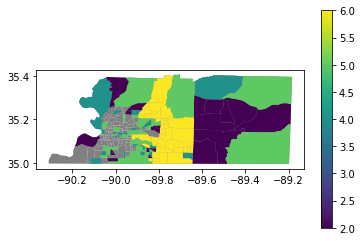

There are 91 NaN census tracts


In [123]:
print('NEW METHODOLOGY - 2000 CATEGORIES')
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['inc_cat_55cut_80120_medhhinc_00'].isna()].plot(ax = ax, column = 'inc_cat_55cut_80120_medhhinc_00', legend = True)
plt.show()
print('There are',city_shp_merge['inc_cat_55cut_80120_medhhinc_00'].isna().sum(), 'NaN census tracts')

NEW METHODOLOGY - 2017 CATEGORIES


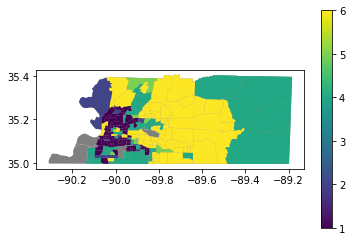

There are 5 NaN census tracts


In [124]:
print('NEW METHODOLOGY - 2017 CATEGORIES')
ax = city_shp_merge.plot(color = 'grey')
city_shp_merge[~city_shp_merge['inc_cat_55cut_80120_medhhinc'].isna()].plot(ax = ax, column = 'inc_cat_55cut_80120_medhhinc', legend = True)
plt.show()
print('There are',city_shp_merge['inc_cat_55cut_80120_medhhinc'].isna().sum(), 'NaN census tracts')

## Rename variables and clean code for doing typology run

In [125]:
## Rename Variables
city_shp_merge = city_shp_merge.rename(columns = {'Fstate':'state_str',
                                                 'Fcounty':'county_str',
                                                 'Ftract':'tract_str',
                                                 'per_owners_90':'per_own_90',
                                                 'per_owners_00':'per_own_00',
                                                 'per_owners_17':'per_own_17',
                                                 'high_dr20':'high_denialrate20',
                                                 'high_dr25':'high_denialrate25',
                                                 'high_dr30':'high_denialrate30',
                                                 'exclusive':'exclusive_tract',
                                                 'per_limove17':'per_limove_17'})

city_shp_merge = city_shp_merge.drop(columns=['hhwchild_17', 'per_hhwchild_17',
                                              'aboverm_per_hhwchild_17', 'rm_per_hhwchild_17',
                                              'aboverm_hhwchild_17','rm_hhwchild_17', '_merge_17'])

city_shp_merge = city_shp_merge.rename(columns = {'cv_typology' : 'OLD_cv_typology',
                                                'cvcat_per_rent_17' : 'OLD_cvcat_per_rent_17',
                                                'cvcat_per_col_17' : 'OLD_cvcat_per_col_17',
                                                'cvcat_hinc_17' : 'OLD_cvcat_hinc_17',
                                                'cvcat_mhval_17' : 'OLD_cvcat_mhval_17',
                                                'cvcat_mrent_17' : 'OLD_cvcat_mrent_17',
                                                'cvcat_hu_17' : 'OLD_cvcat_hu_17',
                                                'cvcat_pop_17' : 'OLD_cvcat_pop_17',
                                                'typology' : 'OLD_typology',
                                                'MHI_vulnrisk_17' : 'OLD_MHI_vulnrisk_17',
                                                'MHI_vulnrisk_17_2' : 'OLD_MHI_vulnrisk_17_2',
                                                'MHI_vulnrisk_17_1' : 'OLD_MHI_vulnrisk_17_1',
                                                'LI_vulnrisk_17' : 'OLD_LI_vulnrisk_17',
                                                'LI_vulnrisk_17_2' : 'OLD_LI_vulnrisk_17_2',
                                                'LI_vulnrisk_17_1' : 'OLD_LI_vulnrisk_17_1',
                                                'gentrisk_00' : 'OLD_gentrisk_00',
                                                'gentrisk_17' : 'OLD_gentrisk_17',
                                                'gent1_00' : 'OLD_gent1_00',
                                                'gent2_00' : 'OLD_gent2_00',
                                                'gent2_17' : 'OLD_gent2_17',
                                                'gent1_17' : 'OLD_gent1_17',
                                                'hotmarket_17' : 'OLD_hotmarket_17',
                                                'hotmarket_00' : 'OLD_hotmarket_00',
                                                'ppt_ch_li_movein_09_17' : 'OLD_ppt_ch_li_movein_09_17',
                                                'ch_pop_00_17' : 'OLD_ch_pop_00_17',
                                                'pctch_pop_00_17' : 'OLD_pctch_pop_00_17',
                                                'ch_per_col_00_17' : 'OLD_ch_per_col_00_17',
                                                'pctch_per_col_00_17' : 'OLD_pctch_per_col_00_17',
                                                'ch_real_mhval_00_17' : 'OLD_ch_real_mhval_00_17',
                                                'pctch_real_mhval_00_17' : 'OLD_pctch_real_mhval_00_17',
                                                'ch_real_mrent_00_17' : 'OLD_ch_real_mrent_00_17',
                                                'pctch_real_mrent_00_17' : 'OLD_pctch_real_mrent_00_17',
                                                'ch_all_li_count_00_17' : 'OLD_ch_all_li_count_00_17',
                                                'pctch_all_li_count_00_17' : 'OLD_pctch_all_li_count_00_17',
                                                'ch_per_all_li_00_17' : 'OLD_ch_per_all_li_00_17',
                                                'pctch_per_all_li_00_17' : 'OLD_pctch_per_all_li_00_17',
                                                'ch_real_hinc_00_17' : 'OLD_ch_real_hinc_00_17',
                                                'pctch_real_hinc_00_17' : 'OLD_pctch_real_hinc_00_17',
                                                'ch_pop_90_00' : 'OLD_ch_pop_90_00',
                                                'pctch_pop_90_00' : 'OLD_pctch_pop_90_00',
                                                'ch_per_col_90_00' : 'OLD_ch_per_col_90_00',
                                                'pctch_per_col_90_00' : 'OLD_pctch_per_col_90_00',
                                                'ch_real_mhval_90_00' : 'OLD_ch_real_mhval_90_00',
                                                'pctch_real_mhval_90_00' : 'OLD_pctch_real_mhval_90_00',
                                                'ch_real_mrent_90_00' : 'OLD_ch_real_mrent_90_00',
                                                'pctch_real_mrent_90_00' : 'OLD_pctch_real_mrent_90_00',
                                                'ch_all_li_count_90_00' : 'OLD_ch_all_li_count_90_00',
                                                'pctch_all_li_count_90_00' : 'OLD_pctch_all_li_count_90_00',
                                                'ch_per_all_li_90_00' : 'OLD_ch_per_all_li_90_00',
                                                'pctch_per_all_li_90_00' : 'OLD_pctch_per_all_li_90_00',
                                                'ch_real_hinc_90_00' : 'OLD_ch_real_hinc_90_00',
                                                'pctch_real_hinc_90_00' : 'OLD_pctch_real_hinc_90_00',
                                                'pop00flag' : 'OLD_pop00flag',
                                                'rm_mrent_90' : 'OLD_rm_mrent_90',
                                                'aboverm_mrent_90' : 'OLDaboverm_mrent_90',
                                                'rm_per_all_li_90' : 'OLD_rm_per_all_li_90',
                                                'aboverm_per_all_li_90' : 'OLD_aboverm_per_all_li_90',
                                                'rm_per_nonwhite_90' : 'OLD_rm_per_nonwhite_90',
                                                'aboverm_per_nonwhite_90' : 'OLD_aboverm_per_nonwhite_90',
                                                'rm_per_rent_90' : 'OLD_rm_per_rent_90',
                                                'aboverm_per_rent_90' : 'OLD_aboverm_per_rent_90',
                                                'rm_per_col_90' : 'OLD_rm_per_col_90',
                                                'aboverm_per_col_90' : 'OLD_aboverm_per_col_90',
                                                'rm_per_col_17' : 'OLD_rm_per_col_17',
                                                'aboverm_per_col_17' : 'OLD_aboverm_per_col_17',
                                                'rm_ch_per_col_90_00' : 'OLD_rm_ch_per_col_90_00',
                                                'aboverm_ch_per_col_90_00' : 'OLD_aboverm_ch_per_col_90_00',
                                                'rm_ch_per_col_00_17' : 'OLD_rm_ch_per_col_00_17',
                                                'aboverm_ch_per_col_00_17' : 'OLD_aboverm_ch_per_col_00_17',
                                                'rm_per_rent_17' : 'OLD_rm_per_rent_17',
                                                'aboverm_per_rent_17' : 'OLD_aboverm_per_rent_17',
                                                'rm_per_nonwhite_17' : 'OLD_rm_per_nonwhite_17',
                                                'aboverm_per_nonwhite_17' : 'OLD_aboverm_per_nonwhite_17',
                                                'rm_per_all_li_17' : 'OLD_rm_per_all_li_17',
                                                'aboverm_per_all_li_17' : 'OLD_aboverm_per_all_li_17',
                                                'rm_pctch_real_mhval_90_00' : 'OLD_rm_pctch_real_mhval_90_00',
                                                'aboverm_pctch_real_mhval_90_00' : 'OLD_aboverm_pctchreal_mhval90_00',
                                                'rm_pctch_real_mhval_00_17' : 'OLD_rm_pctch_real_mhval_00_17',
                                                'aboverm_pctch_real_mhval_00_17' : 'OLD_aboverm_pctchreal_mhval00_17',
                                                'rm_pctch_real_mrent_90_00' : 'OLD_rm_pctch_real_mrent_90_00',
                                                'aboverm_pctch_real_mrent_90_00' : 'OLD_abovermpctch_realmrent90_00',
                                                'rm_pctch_real_mrent_00_17' : 'OLD_rm_pctch_real_mrent_00_17',
                                                'aboverm_pctch_real_mrent_00_17' : 'OLD_abovermpctch_realmrent00_17',
                                                'rm_per_limove_17' : 'OLD_rm_per_limove_17',
                                                'aboverm_per_limove_17' : 'OLD_aboverm_per_limove_17',
                                                'rm_per_units_pre50_17' : 'OLD_rm_per_units_pre50_17',
                                                'aboverm_per_units_pre50_17' : 'OLD_aboverm_per_units_pre50_17',
                                                'rm_pctch_real_hinc_90_00' : 'OLD_rm_pctch_real_hinc_90_00',
                                                'aboverm_pctch_real_hinc_90_00' : 'OLD_abovermpctch_realhinc90_00',
                                                'rm_pctch_real_hinc_00_17' : 'OLD_rm_pctch_real_hinc_00_17',
                                                'aboverm_pctch_real_hinc_00_17' : 'OLD_abovermpctch_realhinc00_17',
                                                'lostli_00' : 'OLD_lostli_00',
                                                'lostli_17' : 'OLD_lostli_17',
                                                'limig17_lessthan09' : 'OLD_limig17_lessthan09',
                                                'rm_mrent_00' : 'OLD_rm_mrent_00',
                                                'aboverm_mrent_00' : 'OLD_aboverm_mrent_00',
                                                'rm_per_all_li_00' : 'OLD_rm_per_all_li_00',
                                                'aboverm_per_all_li_00' : 'OLD_aboverm_perall_li00',
                                                'rm_per_rent_00' : 'OLD_rm_per_rent_00',
                                                'aboverm_per_rent_00' : 'OLD_aboverm_per_rent_00',
                                                'rm_per_nonwhite_00' : 'OLD_rm_per_nonwhite_00',
                                                'aboverm_per_nonwhite_00' : 'OLD_aboverm_per_nonwhite_00',
                                                'rm_per_col_00' : 'OLD_rm_per_col_00',
                                                'aboverm_per_col_00' : 'OLD_aboverm_per_col_00',
                                                'rm_empd_17' : 'OLD_rm_empd_17',
                                                'aboverm_empd_17' : 'OLD_aboverm_empd_17',
                                                'rm_per_built_00_17' : 'OLD_rm_per_built_00_17',
                                                'aboverm_per_built_00_17' : 'OLD_aboverm_per_built_00_17',
                                                'rm_density_17' : 'OLD_rm_density_17',
                                                'aboverm_density_17' : 'OLD_aboverm_density_17',
                                                'rm_per_carcommute_17' : 'OLD_rm_per_carcommute_17',
                                                'aboverm_per_carcommute_17' : 'OLD_aboverm_per_carcommute_17',
                                                'rm_ppt_ch_li_movein_09_17' : 'OLD_rm_ppt_ch_li_movein_09_17',
                                                'aboverm_ppt_ch_li_movein_09_17' : 'OLD_aboverm_pptch_limovein09_17',
                                                'rm_per_nhblk_17' : 'OLD_rm_per_nhblk_17',
                                                'aboverm_per_nhblk_17' : 'OLD_aboverm_per_nhblk_17',
                                                'rm_per_asian_17' : 'OLD_rm_per_asian_17',
                                                'aboverm_per_asian_17' : 'OLD_aboverm_per_asian_17',
                                                'rm_per_hisp_17' : 'OLD_rm_per_hisp_17',
                                                'aboverm_per_hisp_17' : 'OLD_aboverm_per_hisp_17',
                                                'pop17flag' : 'OLD_pop17flag',
                                                'popgrowflag_17' : 'OLD_popgrowflag_17',
                                                'pop_90flag' : 'OLD_pop_90flag',
                                                'per_owners_90' : 'per_own_90',
                                                'per_owners_00' : 'per_own_00',
                                                'per_owners_17' : 'per_own_17'})

#### Edit zillow/affordability data to assign numeric code

In [126]:
city_shp_merge.groupby('lmh_flag_new').count()['FIPS']

lmh_flag_new
.                     5
mixed_high            6
mixed_low             6
mixed_mod           100
predominantly HI     20
predominantly LI     27
predominantly MI     68
Name: FIPS, dtype: int64

HOUSING AFFORDABILITY


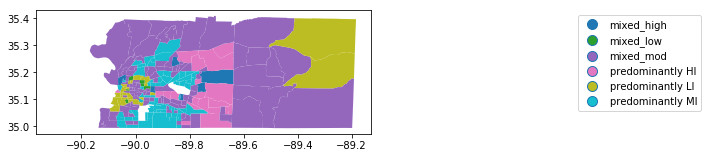

There are 5 NaN census tracts


In [127]:
print('HOUSING AFFORDABILITY')
ax = city_shp_merge.plot(color = 'white')
city_shp_merge[city_shp_merge['lmh_flag_new']!='.'].plot(ax = ax, column = 'lmh_flag_new', legend = True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1, 0, 0))
plt.show()
print('There are',(city_shp_merge['lmh_flag_new']=='.').sum(), 'NaN census tracts')

In [128]:
city_shp_merge.groupby('lmh_flag_new').count()['FIPS']

lmh_flag_new
.                     5
mixed_high            6
mixed_low             6
mixed_mod           100
predominantly HI     20
predominantly LI     27
predominantly MI     68
Name: FIPS, dtype: int64

In [129]:
city_shp_merge.groupby('aff_change_cat_full').count()['FIPS']

aff_change_cat_full
data unavailable              6
high_increase                 4
high_marginal                 3
high_neg                      3
high_rapid_increase          10
low_increase                  9
low_marginal                  5
low_neg                       1
low_rapid_increase           11
mixed_high_increase           1
mixed_high_marginal           1
mixed_high_neg                1
mixed_high_rapid_increase     3
mixed_low_increase            5
mixed_low_rapid_increase      1
mixed_mod_increase           35
mixed_mod_marginal           10
mixed_mod_neg                14
mixed_mod_rapid_increase     41
mod_increase                 21
mod_marginal                 12
mod_neg                      15
mod_rapid_increase           20
Name: FIPS, dtype: int64

MARKET CHANGE CATEGORIES


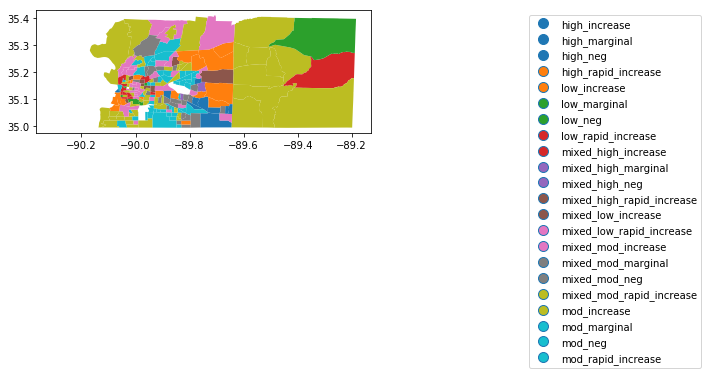

There are 6 NaN census tracts


In [130]:
print('MARKET CHANGE CATEGORIES')
ax = city_shp_merge.plot(color = 'white')
city_shp_merge[city_shp_merge['aff_change_cat_full']!='data unavailable'].plot(ax = ax, column = 'aff_change_cat_full', legend = True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((2, 1, 0, 0))
plt.show()
print('There are',(city_shp_merge['aff_change_cat_full']=='data unavailable').sum(), 'NaN census tracts')

In [131]:
city_shp_merge['lmh_flag_new_encoded'] = 0
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='predominantly LI', 'lmh_flag_new_encoded'] = 1
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='mixed_low', 'lmh_flag_new_encoded'] = 2
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='predominantly MI', 'lmh_flag_new_encoded'] = 3
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='mixed_mod', 'lmh_flag_new_encoded'] = 4
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='predominantly HI', 'lmh_flag_new_encoded'] = 5
city_shp_merge.loc[city_shp_merge['lmh_flag_new']=='mixed_high', 'lmh_flag_new_encoded'] = 6

city_shp_merge['aff_change_cat_full_encoded'] = 0
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_neg', 'aff_change_cat_full_encoded'] = 1
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_marginal', 'aff_change_cat_full_encoded'] = 2
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_increase', 'aff_change_cat_full_encoded'] = 3
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='low_rapid_increase', 'aff_change_cat_full_encoded'] = 4
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_neg', 'aff_change_cat_full_encoded'] = 5
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_marginal', 'aff_change_cat_full_encoded'] = 6
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_increase', 'aff_change_cat_full_encoded'] = 7
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_low_rapid_increase', 'aff_change_cat_full_encoded'] = 8
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_neg', 'aff_change_cat_full_encoded'] = 9
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_marginal', 'aff_change_cat_full_encoded'] = 10
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_increase', 'aff_change_cat_full_encoded'] = 11
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mod_rapid_increase', 'aff_change_cat_full_encoded'] = 12
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_neg', 'aff_change_cat_full_encoded'] = 13
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_marginal', 'aff_change_cat_full_encoded'] = 14
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_increase', 'aff_change_cat_full_encoded'] = 15
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_mod_rapid_increase', 'aff_change_cat_full_encoded'] = 16
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_neg', 'aff_change_cat_full_encoded'] = 17
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_marginal', 'aff_change_cat_full_encoded'] = 18
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_increase', 'aff_change_cat_full_encoded'] = 19
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='high_rapid_increase', 'aff_change_cat_full_encoded'] = 20
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_neg', 'aff_change_cat_full_encoded'] = 21
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_marginal', 'aff_change_cat_full_encoded'] = 22
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_increase', 'aff_change_cat_full_encoded'] = 23
city_shp_merge.loc[city_shp_merge['aff_change_cat_full']=='mixed_high_rapid_increase', 'aff_change_cat_full_encoded'] = 24

In [132]:
### Generate affordability/change category -- for mapping
df = city_shp_merge
var = 'aff_change_cat_map'
df[var] = ''
df[var] = np.where((df['aff_change_cat_full']=='low_neg')|(df['aff_change_cat_full']=='low_marginal'),'low_neg_little', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'low_increase','low_increase', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'low_rapid_increase','low_rapid_increase', df[var])

df[var] = np.where((df['aff_change_cat_full']=='mixed_low_neg')|(df['aff_change_cat_full']=='mixed_low_marginal')|
                   (df['aff_change_cat_full']=='mod_neg')|(df['aff_change_cat_full']=='mod_marginal')|
                   (df['aff_change_cat_full']=='mixed_mod_neg')|(df['aff_change_cat_full']=='mixed_mod_marginal')|
                   (df['aff_change_cat_full']=='mixed_high_neg')|(df['aff_change_cat_full']=='mixed_high_marginal')
                   ,'modmix_neg_little', df[var])

df[var] = np.where((df['aff_change_cat_full']=='mixed_low_increase')|
                   (df['aff_change_cat_full']=='mod_increase')|
                   (df['aff_change_cat_full']=='mixed_mod_increase')|
                   (df['aff_change_cat_full']=='mixed_high_increase'),'modmix_increase', df[var])

df[var] = np.where((df['aff_change_cat_full']=='mixed_low_rapid_increase')|
                   (df['aff_change_cat_full']=='mod_rapid_increase')|
                   (df['aff_change_cat_full']=='mixed_mod_rapid_increase')|
                   (df['aff_change_cat_full']=='mixed_high_rapid_increase'),'modmix_rapid_increase', df[var])

df[var] = np.where((df['aff_change_cat_full']=='high_neg')|(df['aff_change_cat_full']=='high_marginal'),'high_neg_little', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'high_increase','high_increase', df[var])
df[var] = np.where(df['aff_change_cat_full'] == 'high_rapid_increase','high_rapid_increase', df[var])

In [133]:
df['aff_change_cat_map'].unique()

array(['modmix_rapid_increase', 'low_rapid_increase', 'modmix_increase',
       'modmix_neg_little', 'low_increase', 'high_increase', '',
       'high_rapid_increase', 'high_neg_little', 'low_neg_little'],
      dtype=object)

In [134]:
df.groupby('aff_change_cat_map').count()['FIPS']

aff_change_cat_map
                          6
high_increase             4
high_neg_little           6
high_rapid_increase      10
low_increase              9
low_neg_little            6
low_rapid_increase       11
modmix_increase          62
modmix_neg_little        53
modmix_rapid_increase    65
Name: FIPS, dtype: int64

##### Other

## Output file for running typologies code

In [135]:
city_shp_merge.to_csv(out_folder+city+'/' + 'typology_input.csv')

## Mapping Data for Review

In [136]:
### Review of census tracts that are "extra"
housing_units[~housing_units['FIPS'].isin(city_shp_merge['FIPS'])]['FIPS']
### These are the ones located in the water!

0     28033070101
1     28033070102
2     28033070210
3     28033070221
4     28033070222
5     28033070310
6     28033070322
7     28033070323
8     28033070324
9     28033070325
10    28033070411
11    28033070412
12    28033070421
13    28033070422
14    28033070520
15    28033070521
16    28033070522
17    28033070610
18    28033070620
19    28033070630
20    28033070710
21    28033070721
22    28033070722
23    28033070811
24    28033070812
25    28033070821
26    28033070822
27    28033070830
28    28033070900
29    28033071000
30    28033071110
31    28033071120
32    28033071200
33    28093950100
34    28093950200
35    28093950300
36    28093950401
37    28093950402
38    28093950500
Name: FIPS, dtype: object

In [137]:
print(city_shp_merge['mhval_10'].isna().sum())
print(city_shp_merge['mhval_10'].describe())

7
count       225.000000
mean     132484.884444
std       81922.528560
min        9999.000000
25%       67500.000000
50%      109300.000000
75%      173400.000000
max      448800.000000
Name: mhval_10, dtype: float64


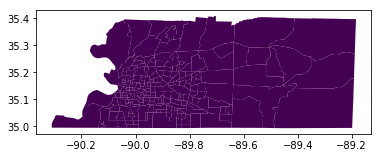

In [138]:
city_shp_merge.plot(column = 'regmedian_income90')
plt.show()